# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

import plotly.express as px

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Import PCA 
from sklearn.decomposition import PCA

# Import KMeans
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

### **Loading the data**

In [2]:
df = pd.read_excel('Credit+Card+Customer+Data.xlsx')

### **Data Overview**

- Observations
- Sanity checks




In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [5]:
df.shape

(660, 7)

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**
- There are 7 columns with 660 rows
- There are no null values in any of the columns
- All columns are of type int64

In [7]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Observations:** There are no null values in the data

In [8]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Observation:** There should be 660 Customer Key however there are only 655, so check for duplicated in this column.

In [9]:
df['Customer Key'].duplicated().sum()

5

In [10]:
# Drop the duplicates in the Customer Key column
df = df.drop_duplicates(subset='Customer Key', keep='first')

**Observation:** The 5 duplicated were removed from the data.

In [11]:
df.drop(columns=['Sl_No'], inplace=True)

In [12]:
df.drop(columns=['Customer Key'], inplace=True)

**Observations:** We will not be using **Customer serial number (S1_No)** or **Customer Key** in our analysis, so remove these columns.

In [13]:
df.duplicated().sum()

11

In [14]:
df = df[~df.duplicated()]

**Observations:** Checking for duplicated in the whole dataset we see that there are **11 duplicates**, so remove those.

In [15]:
df.shape

(644, 5)

**Observations:** The final dataset has **5 columns** with **644 rows**.

#### **Check the summary Statistics**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**
- The Avg_Credit_Limit mean is $34,543 which is way higher than the median of 18,000. This indicates that the mean is being inflated by the outliers. Just from looking at the table above, Avg_Credit_Limit is very skewed to the right as the max is far larger than most values even the 75 percentile (Q3).
- The Total_credit_Cards doesnt seem to have the outliers like in credit_limit with the mean being 4.69 and the median being 5, so both values are about the same.  
- Total_visits_bank the mean bank visits (2.39) is greater than the median (2). bank visits doesnt seem to have outliers. Some people also dont seem to ever visit the bank.
- Total_visits_online the mean (2.62) is larger than the median (2). There seems to be outliers since Q3 is (4) and the max is 15. The min is 0 so most people dont visit the bank online. 
- Total_calls_made the minimum is 0 and the maximum is 10. The mean is (3.6) and the median is (3). This seems to not have outliers.

#### **Univariable  Analysis**

In [17]:
# Defining the hist_box() function
def hist_box(col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15, 10))
    sns.set(style='darkgrid')
    
    # Adding a graph in each part
    sns.boxplot(x=df[col], ax=ax_box, showmeans=True)
    sns.distplot(x=df[col], ax=ax_hist)
    
    # Adding descriptive statistic labels for visualizing the data
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    q1_val = df[col].quantile(0.25)
    q2_val = df[col].quantile(0.5)
    q3_val = df[col].quantile(0.75)
    
    ax_hist.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='orange', linestyle='-', label=f'Median: {median_val:.2f}')
    
    # Adding vertical lines for quartiles
    ax_hist.axvline(q1_val, color='blue', linestyle=':', label=f'Q1: {q1_val:.2f}')
    ax_hist.axvline(q2_val, color='purple', linestyle=':', label=f'Q2: {q2_val:.2f}')
    ax_hist.axvline(q3_val, color='red', linestyle=':', label=f'Q3: {q3_val:.2f}')
    
    # Display the legend
    ax_hist.legend()
    # Display the plot
    plt.show()

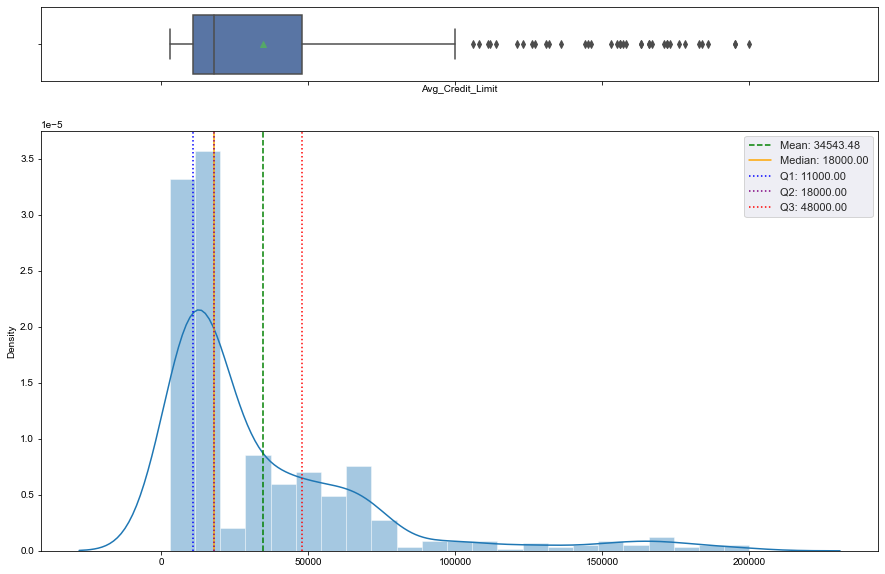

In [18]:
hist_box('Avg_Credit_Limit')

**Observations:** The distibution of Avg_Credit_Limit is heavily right skewed as we saw above. Our most frequent value is $18,000, however the mean is $34,543 which is heavily affected by the outliers in the data.

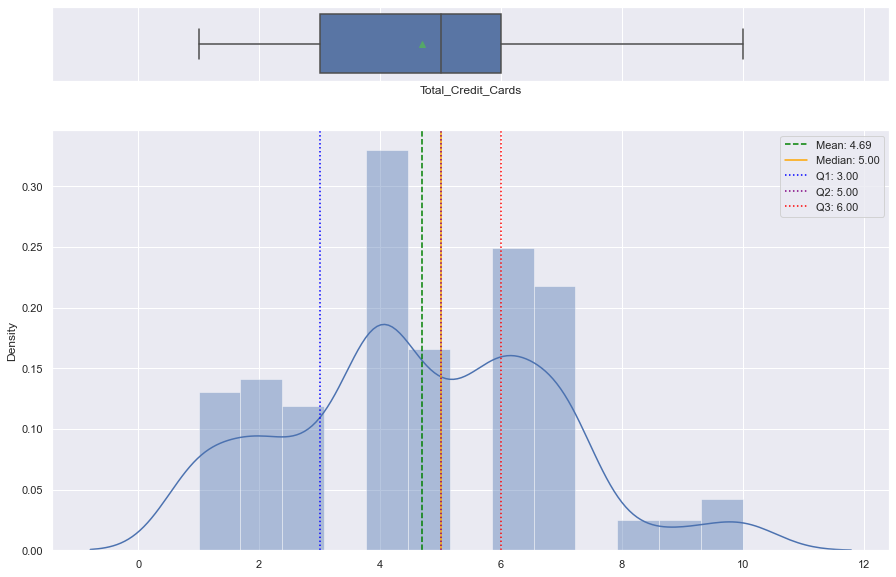

In [19]:
hist_box('Total_Credit_Cards')

**Observations:** Their are no outliers in Total_Credit_cards and it seems to be fairly normally distributed. However, we can also abserve their seems to be groups of amount of cards customers have at the bank. Some have very few cards(1-3), another group having (4-5), another group having (6-7), and the last group having (8-10).

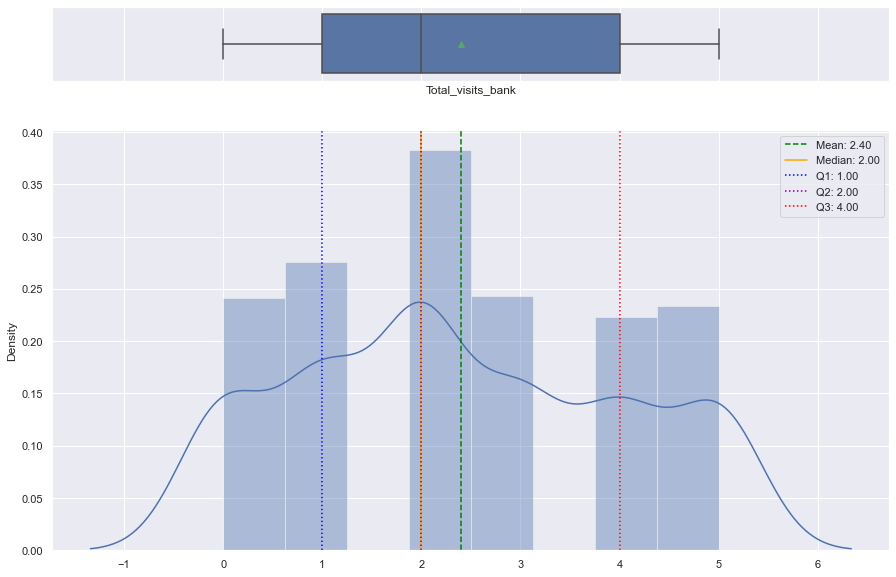

In [20]:
hist_box('Total_visits_bank')

**Observations:** Their are no outliers in the Total_bank_visits and the data seems to be fairly normally distibuted. Like Total_credit_cards we seem to have some groups in the data as some people hardly visit the bank (0-1 visits), a middle group going (2-3 visits), and the last group visting the bank the most (4-5 visits).

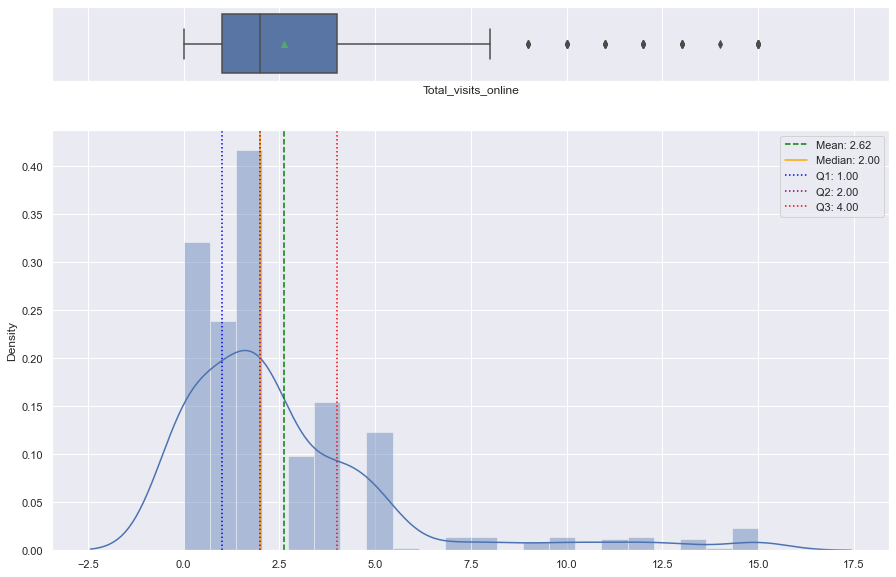

In [21]:
hist_box('Total_visits_online')

**Observations:** Total_visits_online is very right skewed. The minimum is 0 and the maximum is 15. The mean is 2.6 and the median is 2. This indicats that the outliers are pushing the mean up when most people only visit the bank 2 times.

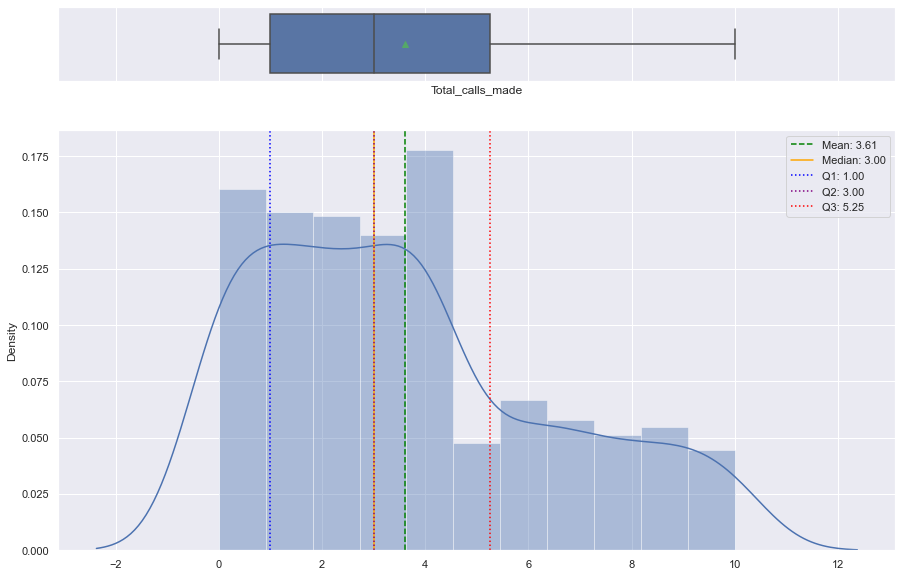

In [22]:
hist_box('Total_calls_made')

**Observations:** Their are no outliers in total_calls_made. The data seems to have two groups people who make few calls (0-4) and people who make most of the calls (5-10).

#### **Bivariable Analysis**

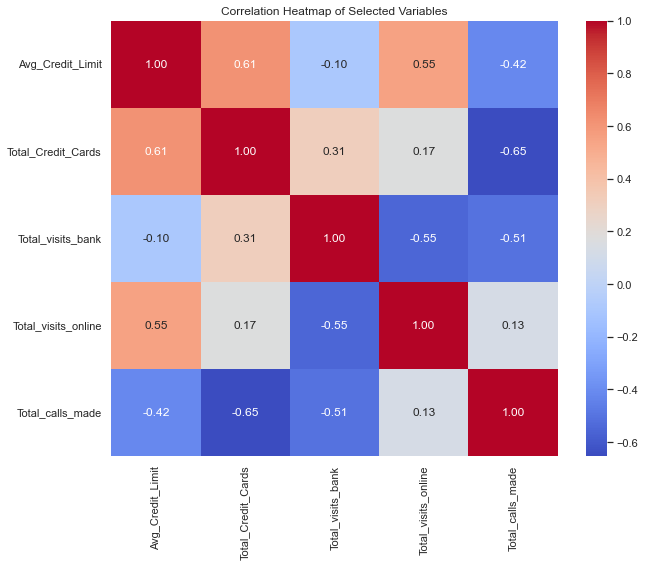

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Selected Variables")
plt.show()

**Observations:**
- Avg_Credit_Limit: It seems that the average credit limit and total credit limit are highly positivly correlated (.61) This indicates that the more credit cards you have at the bank the higher the avg credit limit you will have. It also seems that customers with high avg credit limit seem to visit the bank online (.55) opposed to visiting the bank in person (-.10). People with higher avg credit limit also dont make a lot of total calls made to the bank (-.42). So, People with higher avg credit limit have more credit cards with the bank, they dont visit the bank in person, but they visit the bank online, they also dont make a lot of calls to the bank.
- Total_Credit_Cards: It seems that the total credit cards a customer has the higher the average credit limit is. There is a (.31) correlation between total credit cards and total visits to the bank in person. There is a slightly positive correlation between total credit cards and total visits online, however, its less so than in person visits. We see that the correlation between total credit cards and total calls made is (-0.65) which indicates these people make less calls to the bank.
- Total_visits_bank: Poeple who make a lot of visits to the bank in person have a slight negative correlation with avg_credit_limit (-0.10). People who make a lot of visits to the bank in person have a positive correlation with total credit cards they have with the bank. Customers who make visits to the bank in person have a strong negative correlation with visiting the bank online. Their is also a strong negative correlation with total calls made to the bank.
- Total_visits_online: total visits online has a strong positive correlation with avg_credit_limit (.55). Their is a weak positive correlation with total credit cards they have with the bank. Their is a strong negative correlation with total visits online with total visits to the bank in person. Their is a weak positive correlation (0.13) with visits online and total calls made to the bank
- Total_calls_made: total calls made is strongly negative correlated with avg_credit_limit (-0.42), total_credit_cards (-0.65), total_visits_bank (-0.51). Their is also a weak positive correlation with total visits online. So, people who make a lot of calls to the bank dont have a high credit limit, dont have very many cards, dont visit the bank and are slightly correlated with visits online.

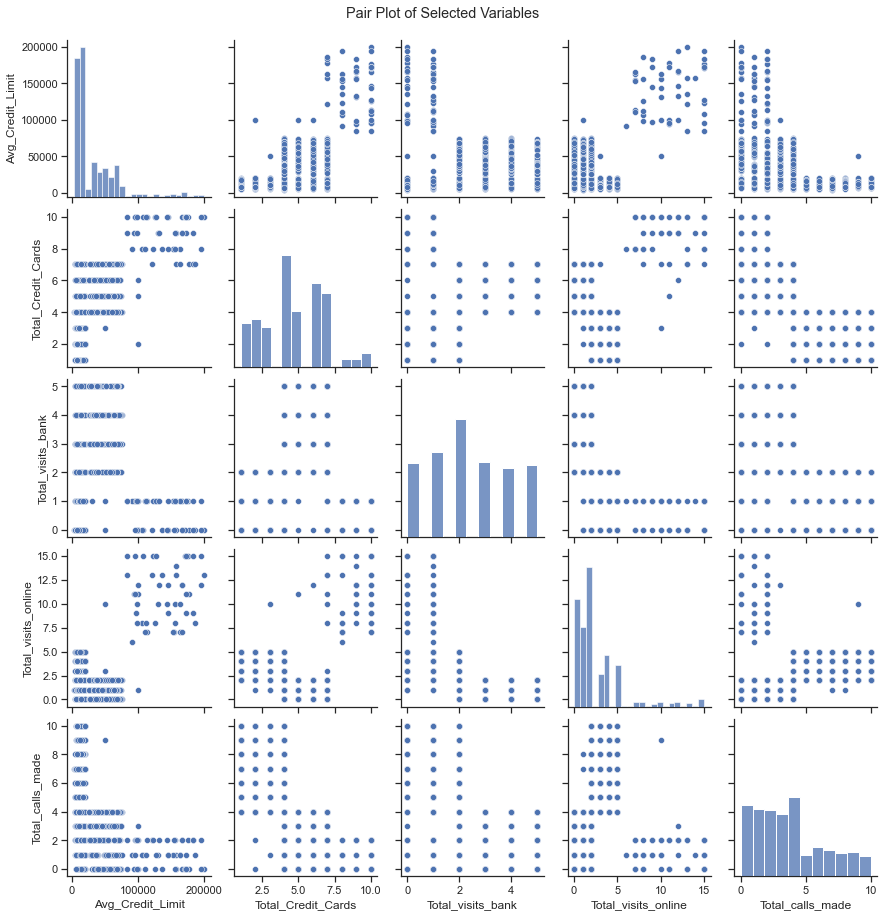

In [24]:
# Create a pair plot using seaborn
sns.set(style='ticks')
sns.pairplot(df[:])
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

**Observations:**
- Avg_Credit_Limit: In the pairplot credit limit seems to be correlated with number of credit cards, this can be seen in the correlation matrix above as well. We can see their is a negative correlation iwth visiting the bank in person, as well as calls made to the bank with people with higher avg_credit_limit. However, like above we see that people with higher avg_credit_limit have higher visits online.
- Total_Credit_Cards: Like above total credit cards seems to go up with the higher the avg credit limit. We can see that there is a slight correlation with credit cards and visits to the bank, but its not the strongest correlations. There is a strong correlation between total credit cards and visits online, as well as a negative correlation between total credit cards and calls to the bank.
- Total_visits_bank: There seems to be a negative correlation between visits to the bank and having a higher credit limit. a slight positive correlation between visits to the bank and total credit cards. We see that having a higher total visits to the bank has a negative correlation with visits online and calls made to the bank.
- Total_visits_online: There is a positive correlation with visits online and avg credit limit and total credit cards. There is a negative correlation between visits online and visits in person as well as calls made to the bank.
- Total_calls_made: There is a negative correlation between calls made to the bank and avg credit limit and total credit cards and a very slight correlation between visits online. There is a negative correlation between calls made to the bank and visits to the bank in person.
- The graphs seem to show what we saw in the correlation matrix.

#### **Scaling the data**

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

#### **Applying PCA on scaled data**

In [26]:
# Defining the number of principal components to generate
n = df_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

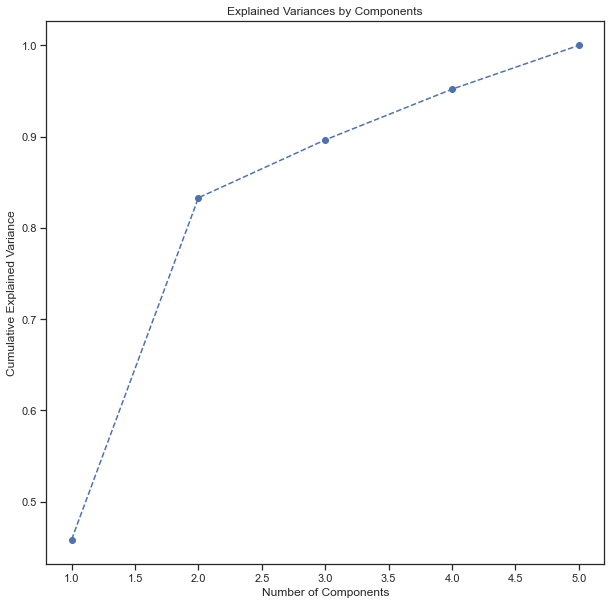

In [27]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

**Observations:**
- We see that with just two principal components can explain 83% of the variance of the data. The last three principal components on make up 17% of the variance of the data.

In [28]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

data_pca = pd.DataFrame(np.round(pca.components_[:5,:],2), index = pc_comps, columns = df_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5
Avg_Credit_Limit,0.49,0.40,-0.03,0.30,-0.71
Total_Credit_Cards,0.60,0.03,-0.26,-0.75,0.12
Total_visits_bank,0.28,-0.59,-0.62,0.43,0.07
Total_visits_online,0.12,0.66,-0.29,0.32,0.60
Total_calls_made,-0.56,0.23,-0.68,-0.25,-0.34


In [29]:
def color_high(val):
    
    if val < -0.40:                     
        return 'background: pink'
    
    elif val > 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
Avg_Credit_Limit,0.490000,0.400000,-0.030000,0.300000,-0.710000
Total_Credit_Cards,0.600000,0.030000,-0.260000,-0.750000,0.120000
Total_visits_bank,0.280000,-0.590000,-0.620000,0.430000,0.070000
Total_visits_online,0.120000,0.660000,-0.290000,0.320000,0.600000
Total_calls_made,-0.560000,0.230000,-0.680000,-0.250000,-0.340000


**Observations:**
- First principal component: Avg_credit_limit (0.49) and total_Credit_cards (0.6) have the highest postitve correlation. As, the first principal component goes up so do these features. Another feature of note is Total_calls_made (-0.56) which has a negative correlation with the first component, so as the first principal component goes up this feature goes down. 
- Second principal component: Total_visits_bank (-0.59) has a strong negative correlation with the second principal component, so as the second principal component goes up this feature goes down. Total_visits_online (0.66) is the highest correlation with the second principal component, so as the second principal component goes up this feature goes up as well.
- Third principal component: All feaures are negatively correlated with this component. The highest negative correlations are Total_visits_bank
- Fourth principal component: Total_credit_cards (-0.75) is the largest negative correlation, so as the fourth principal component goes up this feature goes down. Total_visits_online (0.43) is the highest correlation with the fourth principal component, so as the fourth principal component goes up so does this feature. 
- Fifth principal component: Total_visits_online (0.6) is the highest positive correlated variable, so as the fifth principal component goes up, so does this feature. 
Avg_credit_limit (-0.71) is the largest negative correlation, so as the fifth principal component goes up, this feature goes down.

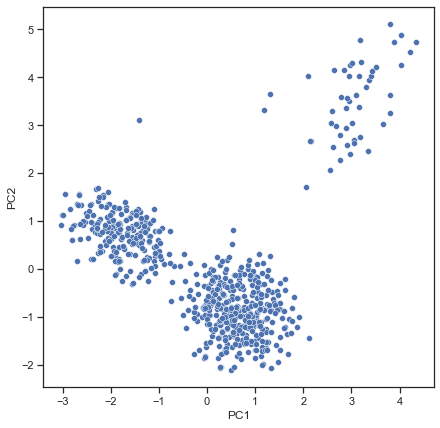

In [30]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = df_pca[0], y = df_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**
- The data seems to be seperated well into two or three groups using pca.

In [31]:
# Scatter plot for all three components
fig = plt.figure(figsize = (10, 10))

x = df_pca[0]

y = df_pca[1]

z = df_pca[2]

fig = px.scatter_3d(x=x, y=y, z=z)
fig.update_layout(scene=dict(aspectmode="cube"))
fig.show()

<Figure size 720x720 with 0 Axes>

**Observations:**
- Adding the the third principal component doesnt seem to change the fundamental structure of visualizing the data, which is expected from the explained variance above.

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

In [32]:
df_pca_kmeans = df_pca.copy()

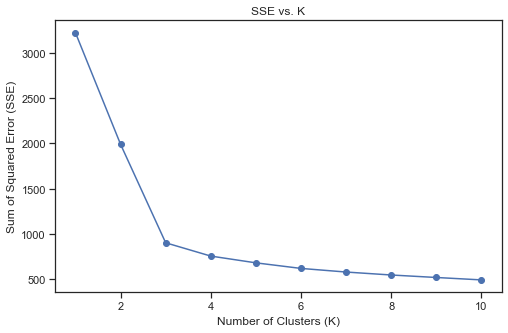

In [33]:
# Initialize a dictionary to store SSE for each K
sse = {}

# Run for a range of Ks and store SSE for each run
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_kmeans)  
    sse[k] = kmeans.inertia_

# Plot the SSE vs K and plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('SSE vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

**Observations:**
- The elbow of the plot is at three principal components, so three clusters seems to be the best fit to our data so we minimite the number of clusters and maximize SSE. This seems to match the visual clustering of the first two components above.

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

In [34]:
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca_kmeans)

KMeans(n_clusters=3, random_state=42)

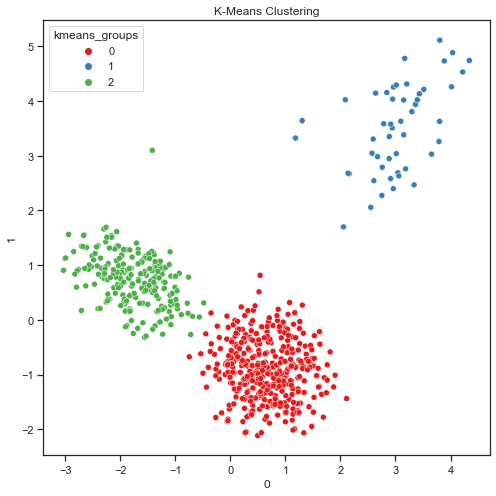

In [35]:
# Add cluster labels to your DataFrame
df_pca_kmeans['kmeans_groups'] = kmeans.labels_
df['kmeans_groups'] = kmeans.labels_
# Define a custom color mapping for the groups
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}
# Create a scatter plot 
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_pca_kmeans[0], y=df_pca_kmeans[1], data=df_pca_kmeans, hue=df_pca_kmeans['kmeans_groups'], palette='Set1')
plt.title("K-Means Clustering")
plt.show()

**Observations:**
- There are three clusters and they seem to match a basic visual clustering that was done earlier.

#### **Create the cluster profiles using the summary statistics and box plots for each label**

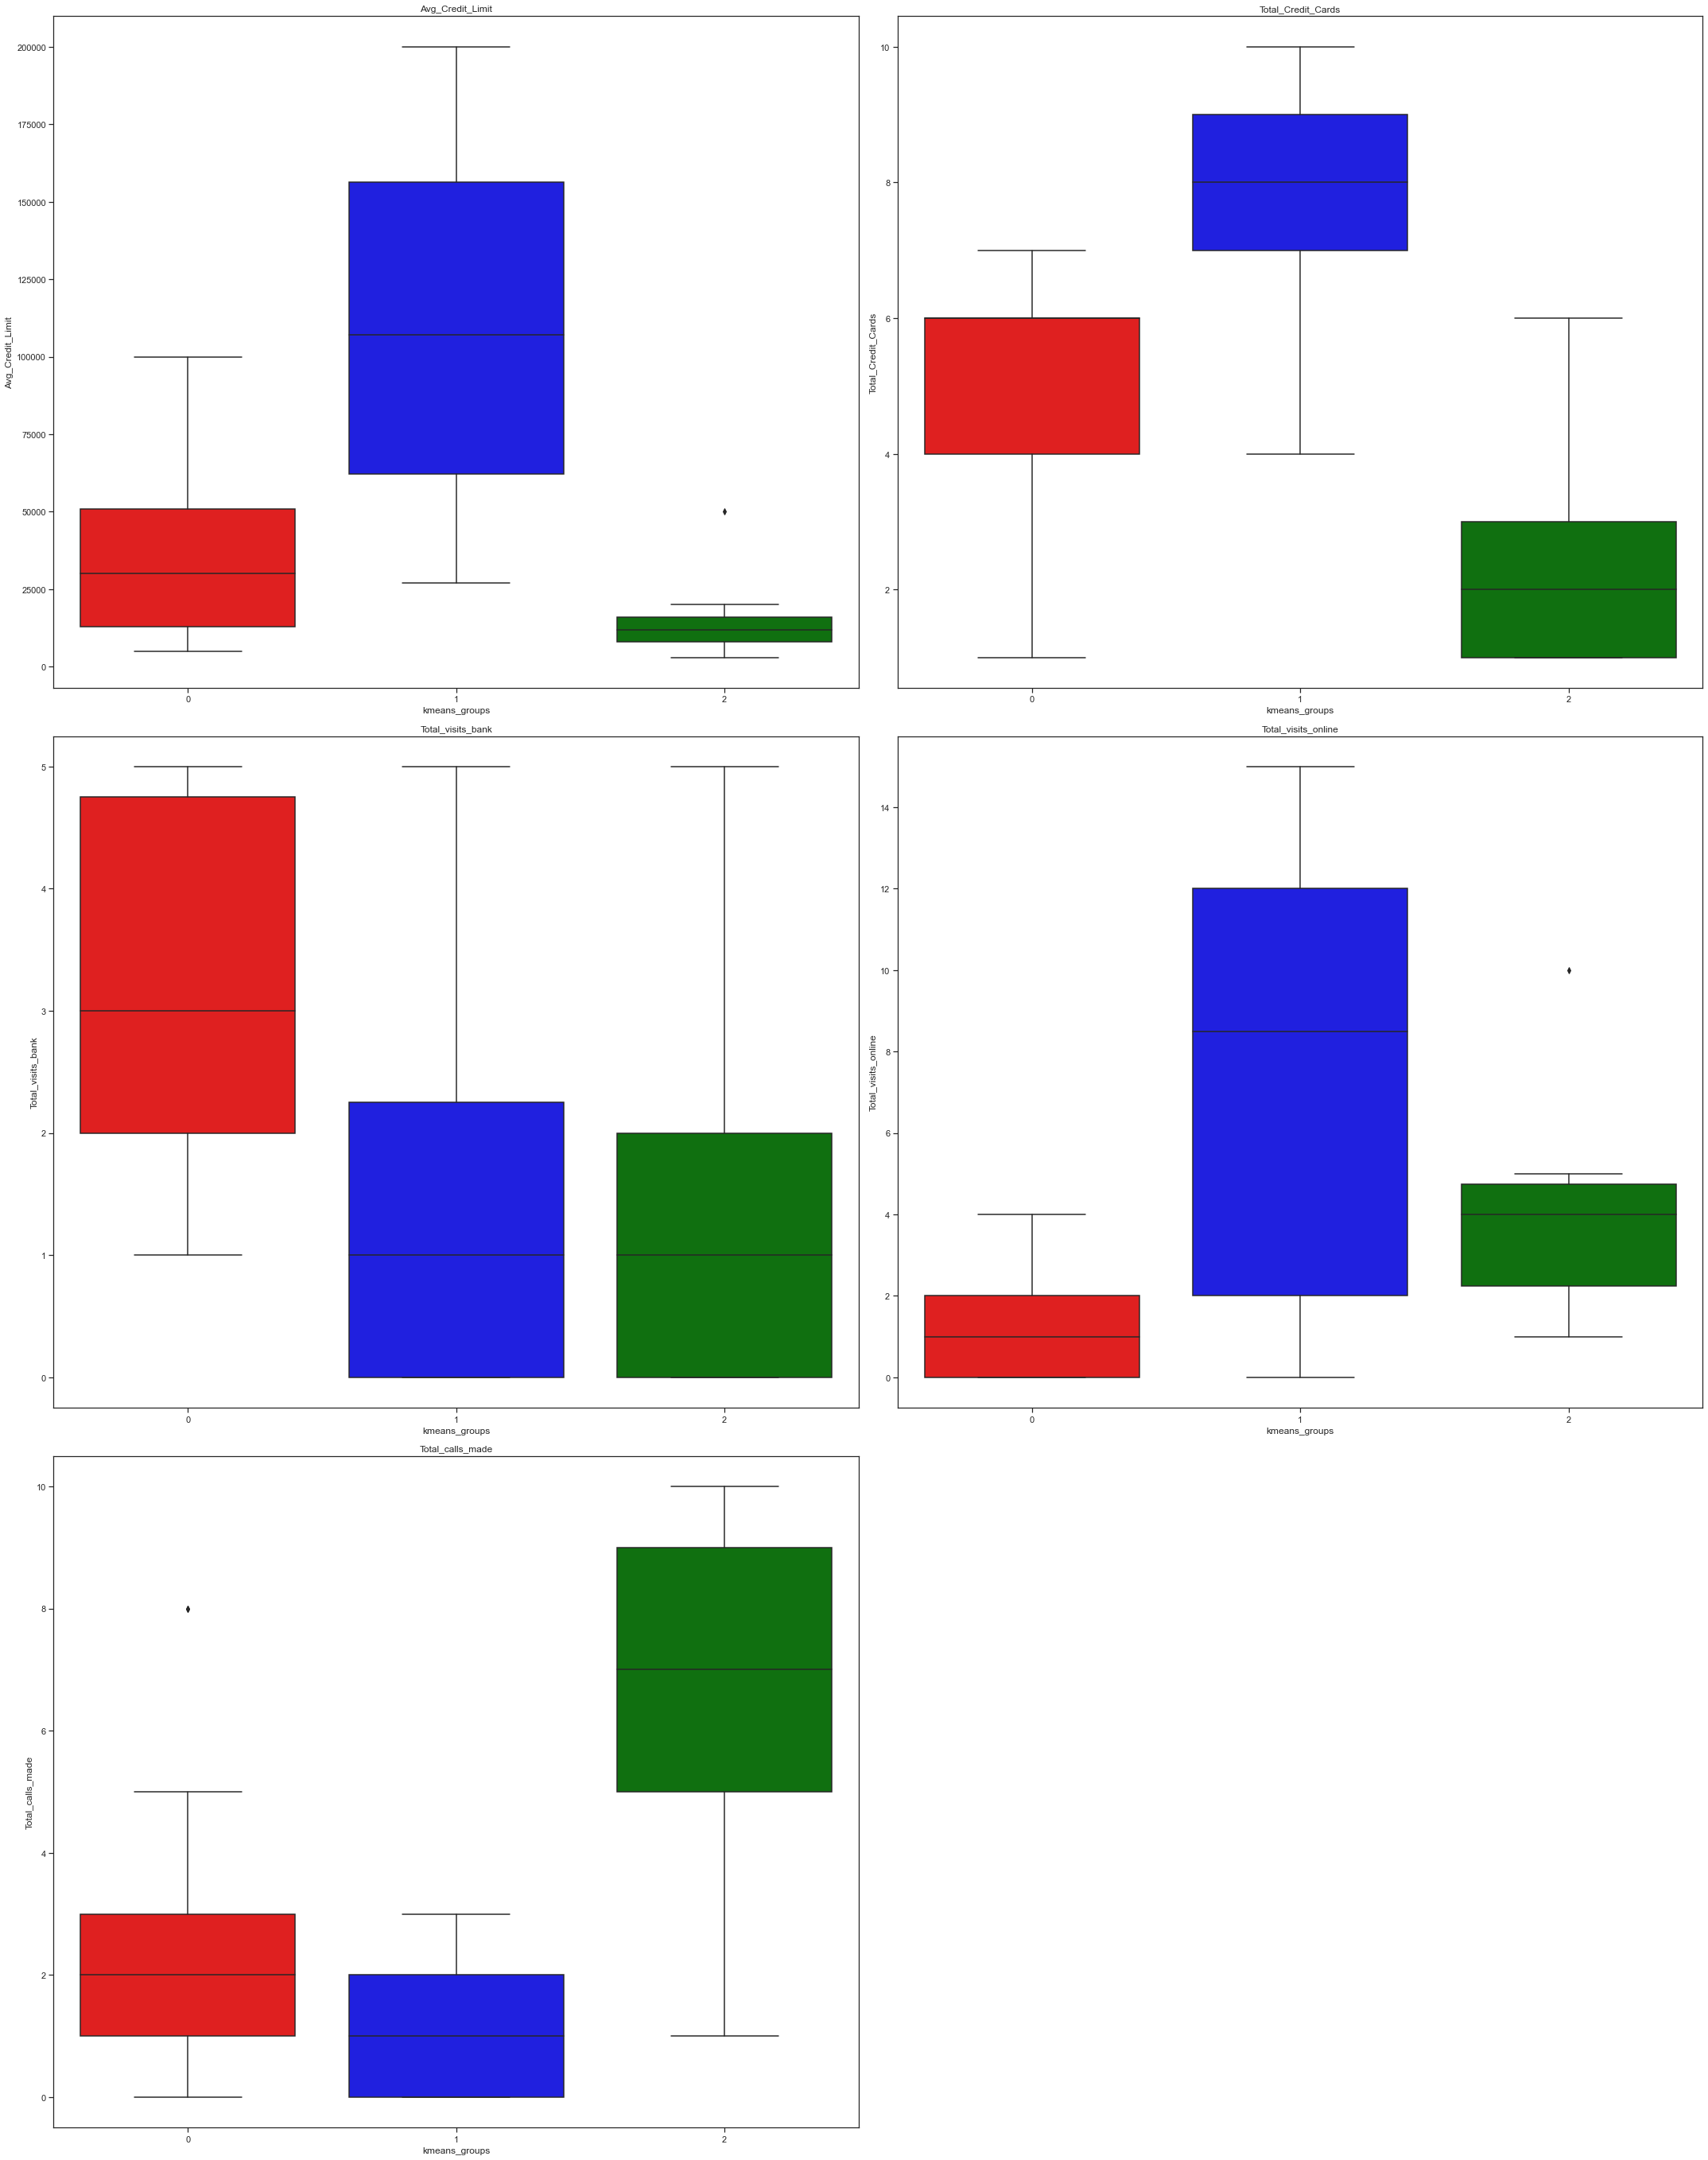

In [36]:
all_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# print(all_col)
plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(y=df[variable], x=df_pca_kmeans['kmeans_groups'], palette=color_mapping)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

In [37]:
df_pca_kmeans['kmeans_groups'].value_counts()

0    374
2    221
1     49
Name: kmeans_groups, dtype: int64

**Observations:** 
- Group 0 has 374 observations in the cluster, making it the largest cluster in the dataset.
- Group 1 has 49 observations in the cluster, making it the second largest cluster in the dataset.
- Group 2 has 221 observations in the cluster, making it the smallest cluster in the dataset and by a large amount.
- Avg_Credit_Limit: Group 2 has the smallest avg_credit_limit by far. Group 0 is the secont largest avg_credit_limit. Group 1 has the largest avg_credit_limit by far. 
- Total_Credit_Cards: Group 2 has the smallest total_credit_cards. Group 0 has the second largest total_credit_cards out of the groups. Group 1 has the most amount of credit cards out of all the groups.
- Total_visits_Bank: The distibution of total_visits_bank is very similar in group 1 and group 2. Group 0 visits the bank in person the most out of all the groups.
- Total_visits_Online: Group 0 visits online the least out of all the groups. Group 2 visits online the second moust out of the groups. Group 1 visits online the most bar far out of all the groups.
- Total_Calls_Made: Group 1 makes the least calls to the bank. Group 0 makes the second most calls to the bank. Group 2 makes the most calls to the bank.

In [38]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('kmeans_groups')[variables].describe()

Avg_Credit_Limit                                        \
                         count           mean           std      min   
kmeans_groups                                                          
0                        374.0   33893.048128  22125.993225   5000.0   
1                         49.0  140102.040816  34163.970360  84000.0   
2                        221.0   12239.819005   5252.830230   3000.0   

                                                      Total_Credit_Cards  \
                    25%       50%       75%       max              count   
kmeans_groups                                                              
0               13250.0   31500.0   51750.0  100000.0              374.0   
1              108000.0  145000.0  167000.0  200000.0               49.0   
2                8000.0   12000.0   16000.0   50000.0              221.0   

                                                              \
                   mean       std  min  25%  50%   75%   max   
kmeans_groups                                                  
0              5.508021  1.140852  2.0  4.0  6.0   6.0   7.0   
1              8.775510  1.262691  5.0  8.0  9.0  10.0  10.0   
2              2.411765  1.098614  1.0  1.0  2.0   3.0   4.0   

              Total_visits_bank                                                \
                          count      mean       std  min  25%  50%   75%  max   
kmeans_groups                                                                   
0                         374.0  3.489305  1.131391  1.0  3.0  3.0  4.75  5.0   
1                          49.0  0.591837  0.496587  0.0  0.0  1.0  1.00  1.0   
2                         221.0  0.945701  0.801556  0.0  0.0  1.0  2.00  2.0   

              Total_visits_online                                             \
                            count       mean       std  min  25%   50%   75%   
kmeans_groups                                                                  
0                           374.0   0.975936  0.858303  0.0  0.0   1.0   2.0   
1                            49.0  10.979592  2.854016  6.0  8.0  11.0  13.0   
2                           221.0   3.561086  1.221819  1.0  2.0   4.0   4.0   

                    Total_calls_made                                          \
                max            count      mean       std  min  25%  50%  75%   
kmeans_groups                                                                  
0               3.0            374.0  1.997326  1.432107  0.0  1.0  2.0  3.0   
1              15.0             49.0  1.102041  0.871897  0.0  0.0  1.0  2.0   
2              10.0            221.0  6.891403  1.990196  1.0  5.0  7.0  9.0   

                     
                max  
kmeans_groups        
0               4.0  
1               3.0  
2              10.0

**Cluster Profiles:**
- Group 0: Group 0 is the largest group with 374 observations, so this group makes up the primary customer type of the bank. The mean credit_limit is 
$33,893, this groups mean for credit cards is 5.5 credit cards. This group has the largest mean when it comes to total_visits_bank with 3.5 visits. They are the group with the lowest visits online with a mean of .97. They make the second highest mean of total_calls_made with 1.99 calls.
- Group 1: Group 1 seems to probably be wealther customers, since they tend to have very high avg_credit_limit of $140,102 and they have the most total_credit_cards of 8.8 cards in the bank. This group is also the smallest group with only 49 observations which makes since if they are the most wealthy customers of the bank. This group also favors visiting the bank online (mean of 10.9 visits online) rather than making a call (total_calls_made, mean of 1.1 calls) or going in person (total_visits_bank, mean of .59 visits in person)
- Group 2: Group 2 is the second largest group with 221 observations. This group has the lowest mean Avg_credit_limit of $12,239, as well as the lowest number of credit cards with the bank (2.4 credit cards). This group doesnt visit the bank in person very often as the mean is 0.94 visits which is the second highest. This group visits the bank online more than group 1 but far fewer than group 2 at a mean of 3.56 visits online. This group makes the most calls to the bank by far with a mean of 6.89 calls, which is the largest of any group by far.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [39]:
df_pca_gmm = df_pca.copy()

In [40]:
df_pca_gmm.head()

,0,1,2,3,4
0,0.520075,0.513577,1.818726,1.227488,-1.364728
1,-1.420238,3.098904,-0.881905,0.395162,0.366338
2,0.539699,0.815314,0.114006,-1.030473,-0.193124
3,-0.352709,0.127433,0.568003,-0.720864,-0.330915
4,1.303723,3.640665,-0.068361,0.513522,0.694618


In [41]:
gmm = GaussianMixture(n_components = 3, random_state = 1)  # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(df_pca_gmm)   

GaussianMixture(n_components=3, random_state=1)

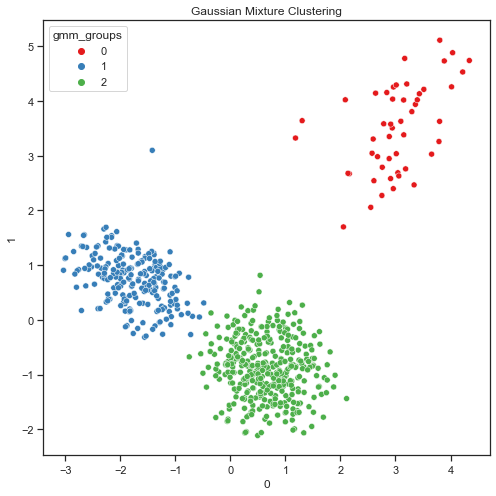

In [42]:
# Add cluster labels to your DataFrame
df_pca_gmm['gmm_groups'] = gmm.predict(df_pca_gmm)
df['gmm_groups'] = gmm.predict(df_pca)
# Define a custom color mapping for the groups
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_pca_gmm[0], y=df_pca_gmm[1], data=df_pca_gmm, hue=df_pca_gmm['gmm_groups'], palette='Set1')
plt.title("Gaussian Mixture Clustering")
plt.show()

#### **Create the cluster profiles using the summary statistics and box plots for each label**


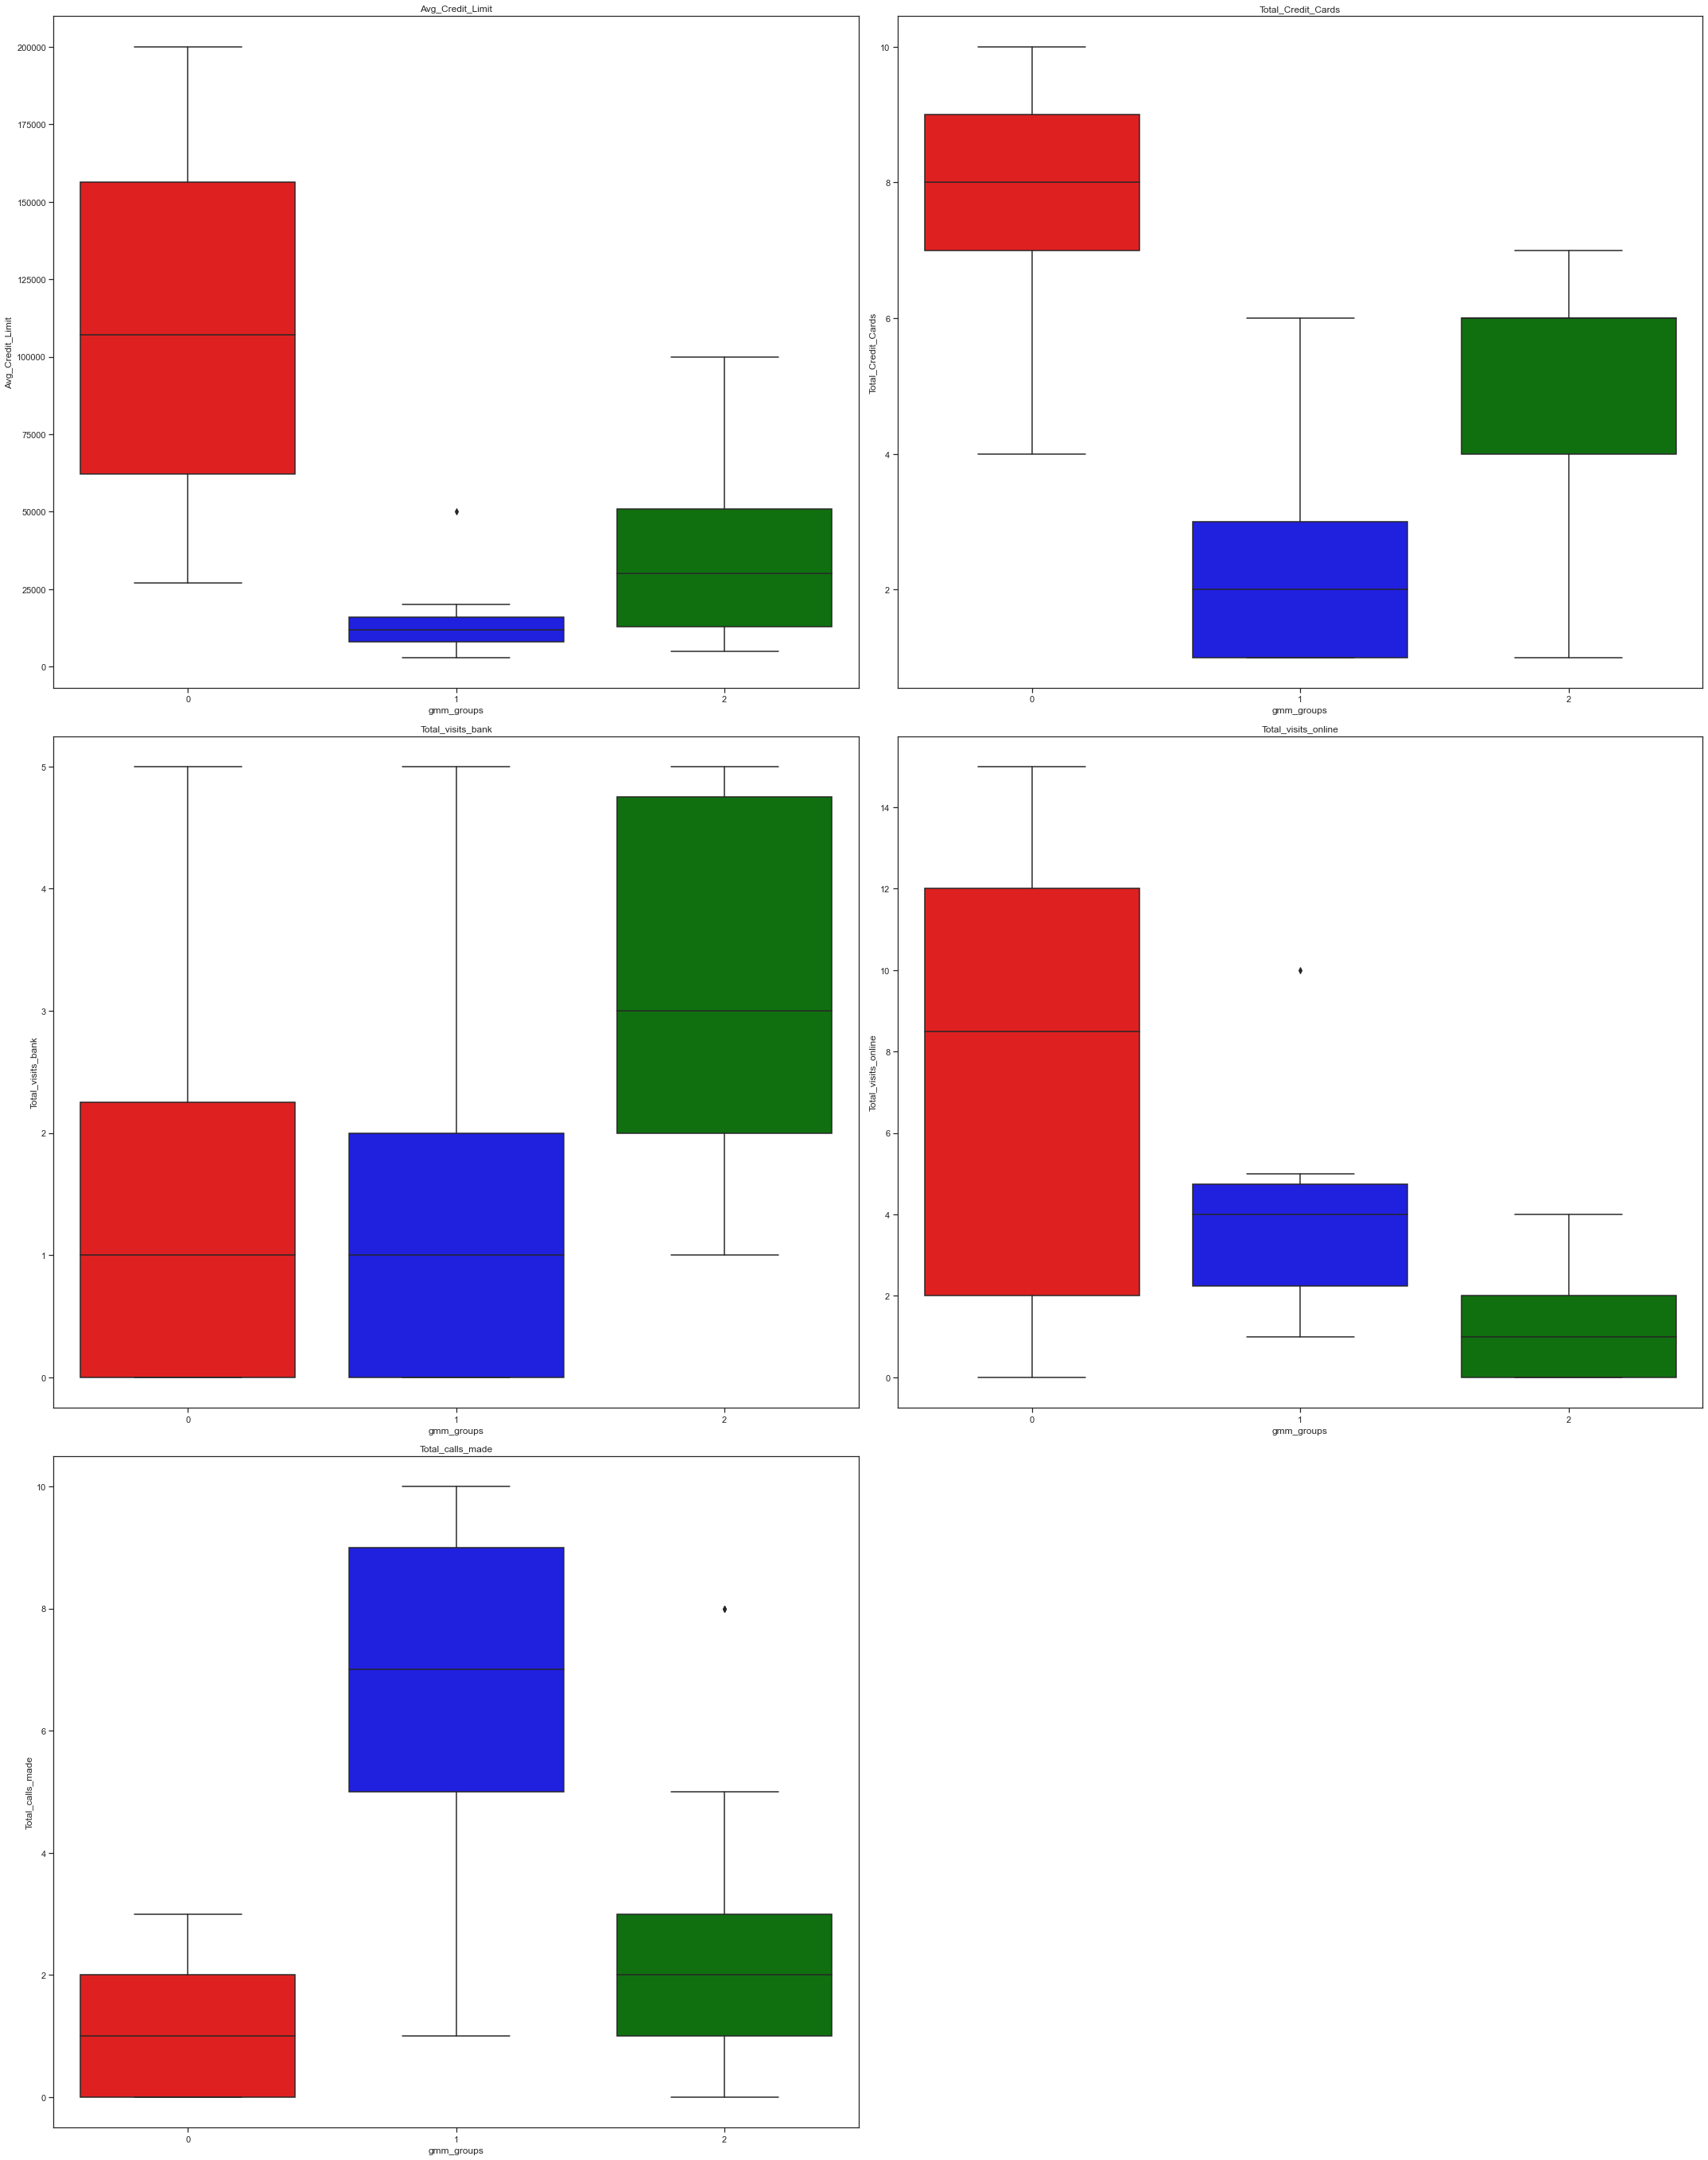

In [43]:
all_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(4, 2, i + 1)

    sns.boxplot(y=df[variable], x=df_pca_gmm['gmm_groups'], palette=color_mapping)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations:**
- Group 0: Has the highest mean avg_credit_limit, total_credit_cards, total_visits_online. This group has the similar mean to group 1 with total_visits_bank. This group has the smallest total_calls_made out of all groups.
- Group 1: Has the lowest avg_credit_limit, total_credit_cards. This group is similar to group 0 with total_visits_bank. This groups is the second highest total_visits_online. This group makes the most calls to the bank.
- Group 2: This group is the middle of the road with the mean of avg_credit_limit, total_credit_cards. This group has the highest mean total_visits_bank. THis group makes the least amount of visits online. This group is the second highest total_calls_made out of the groups.

In [44]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('gmm_groups')[variables].describe()

Avg_Credit_Limit                                                  \
                      count           mean           std      min       25%   
gmm_groups                                                                    
0                      49.0  140102.040816  34163.970360  84000.0  108000.0   
1                     221.0   12239.819005   5252.830230   3000.0    8000.0   
2                     374.0   33893.048128  22125.993225   5000.0   13250.0   

                                         Total_Credit_Cards            \
                 50%       75%       max              count      mean   
gmm_groups                                                              
0           145000.0  167000.0  200000.0               49.0  8.775510   
1            12000.0   16000.0   50000.0              221.0  2.411765   
2            31500.0   51750.0  100000.0              374.0  5.508021   

                                                Total_visits_bank            \
                 std  min  25%  50%   75%   max             count      mean   
gmm_groups                                                                    
0           1.262691  5.0  8.0  9.0  10.0  10.0              49.0  0.591837   
1           1.098614  1.0  1.0  2.0   3.0   4.0             221.0  0.945701   
2           1.140852  2.0  4.0  6.0   6.0   7.0             374.0  3.489305   

                                               Total_visits_online             \
                 std  min  25%  50%   75%  max               count       mean   
gmm_groups                                                                      
0           0.496587  0.0  0.0  1.0  1.00  1.0                49.0  10.979592   
1           0.801556  0.0  0.0  1.0  2.00  2.0               221.0   3.561086   
2           1.131391  1.0  3.0  3.0  4.75  5.0               374.0   0.975936   

                                                 Total_calls_made            \
                 std  min  25%   50%   75%   max            count      mean   
gmm_groups                                                                    
0           2.854016  6.0  8.0  11.0  13.0  15.0             49.0  1.102041   
1           1.221819  1.0  2.0   4.0   4.0  10.0            221.0  6.891403   
2           0.858303  0.0  0.0   1.0   2.0   3.0            374.0  1.997326   

                                                
                 std  min  25%  50%  75%   max  
gmm_groups                                      
0           0.871897  0.0  0.0  1.0  2.0   3.0  
1           1.990196  1.0  5.0  7.0  9.0  10.0  
2           1.432107  0.0  1.0  2.0  3.0   4.0

In [45]:
df_pca_gmm['gmm_groups'].value_counts()

2    374
1    221
0     49
Name: gmm_groups, dtype: int64

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

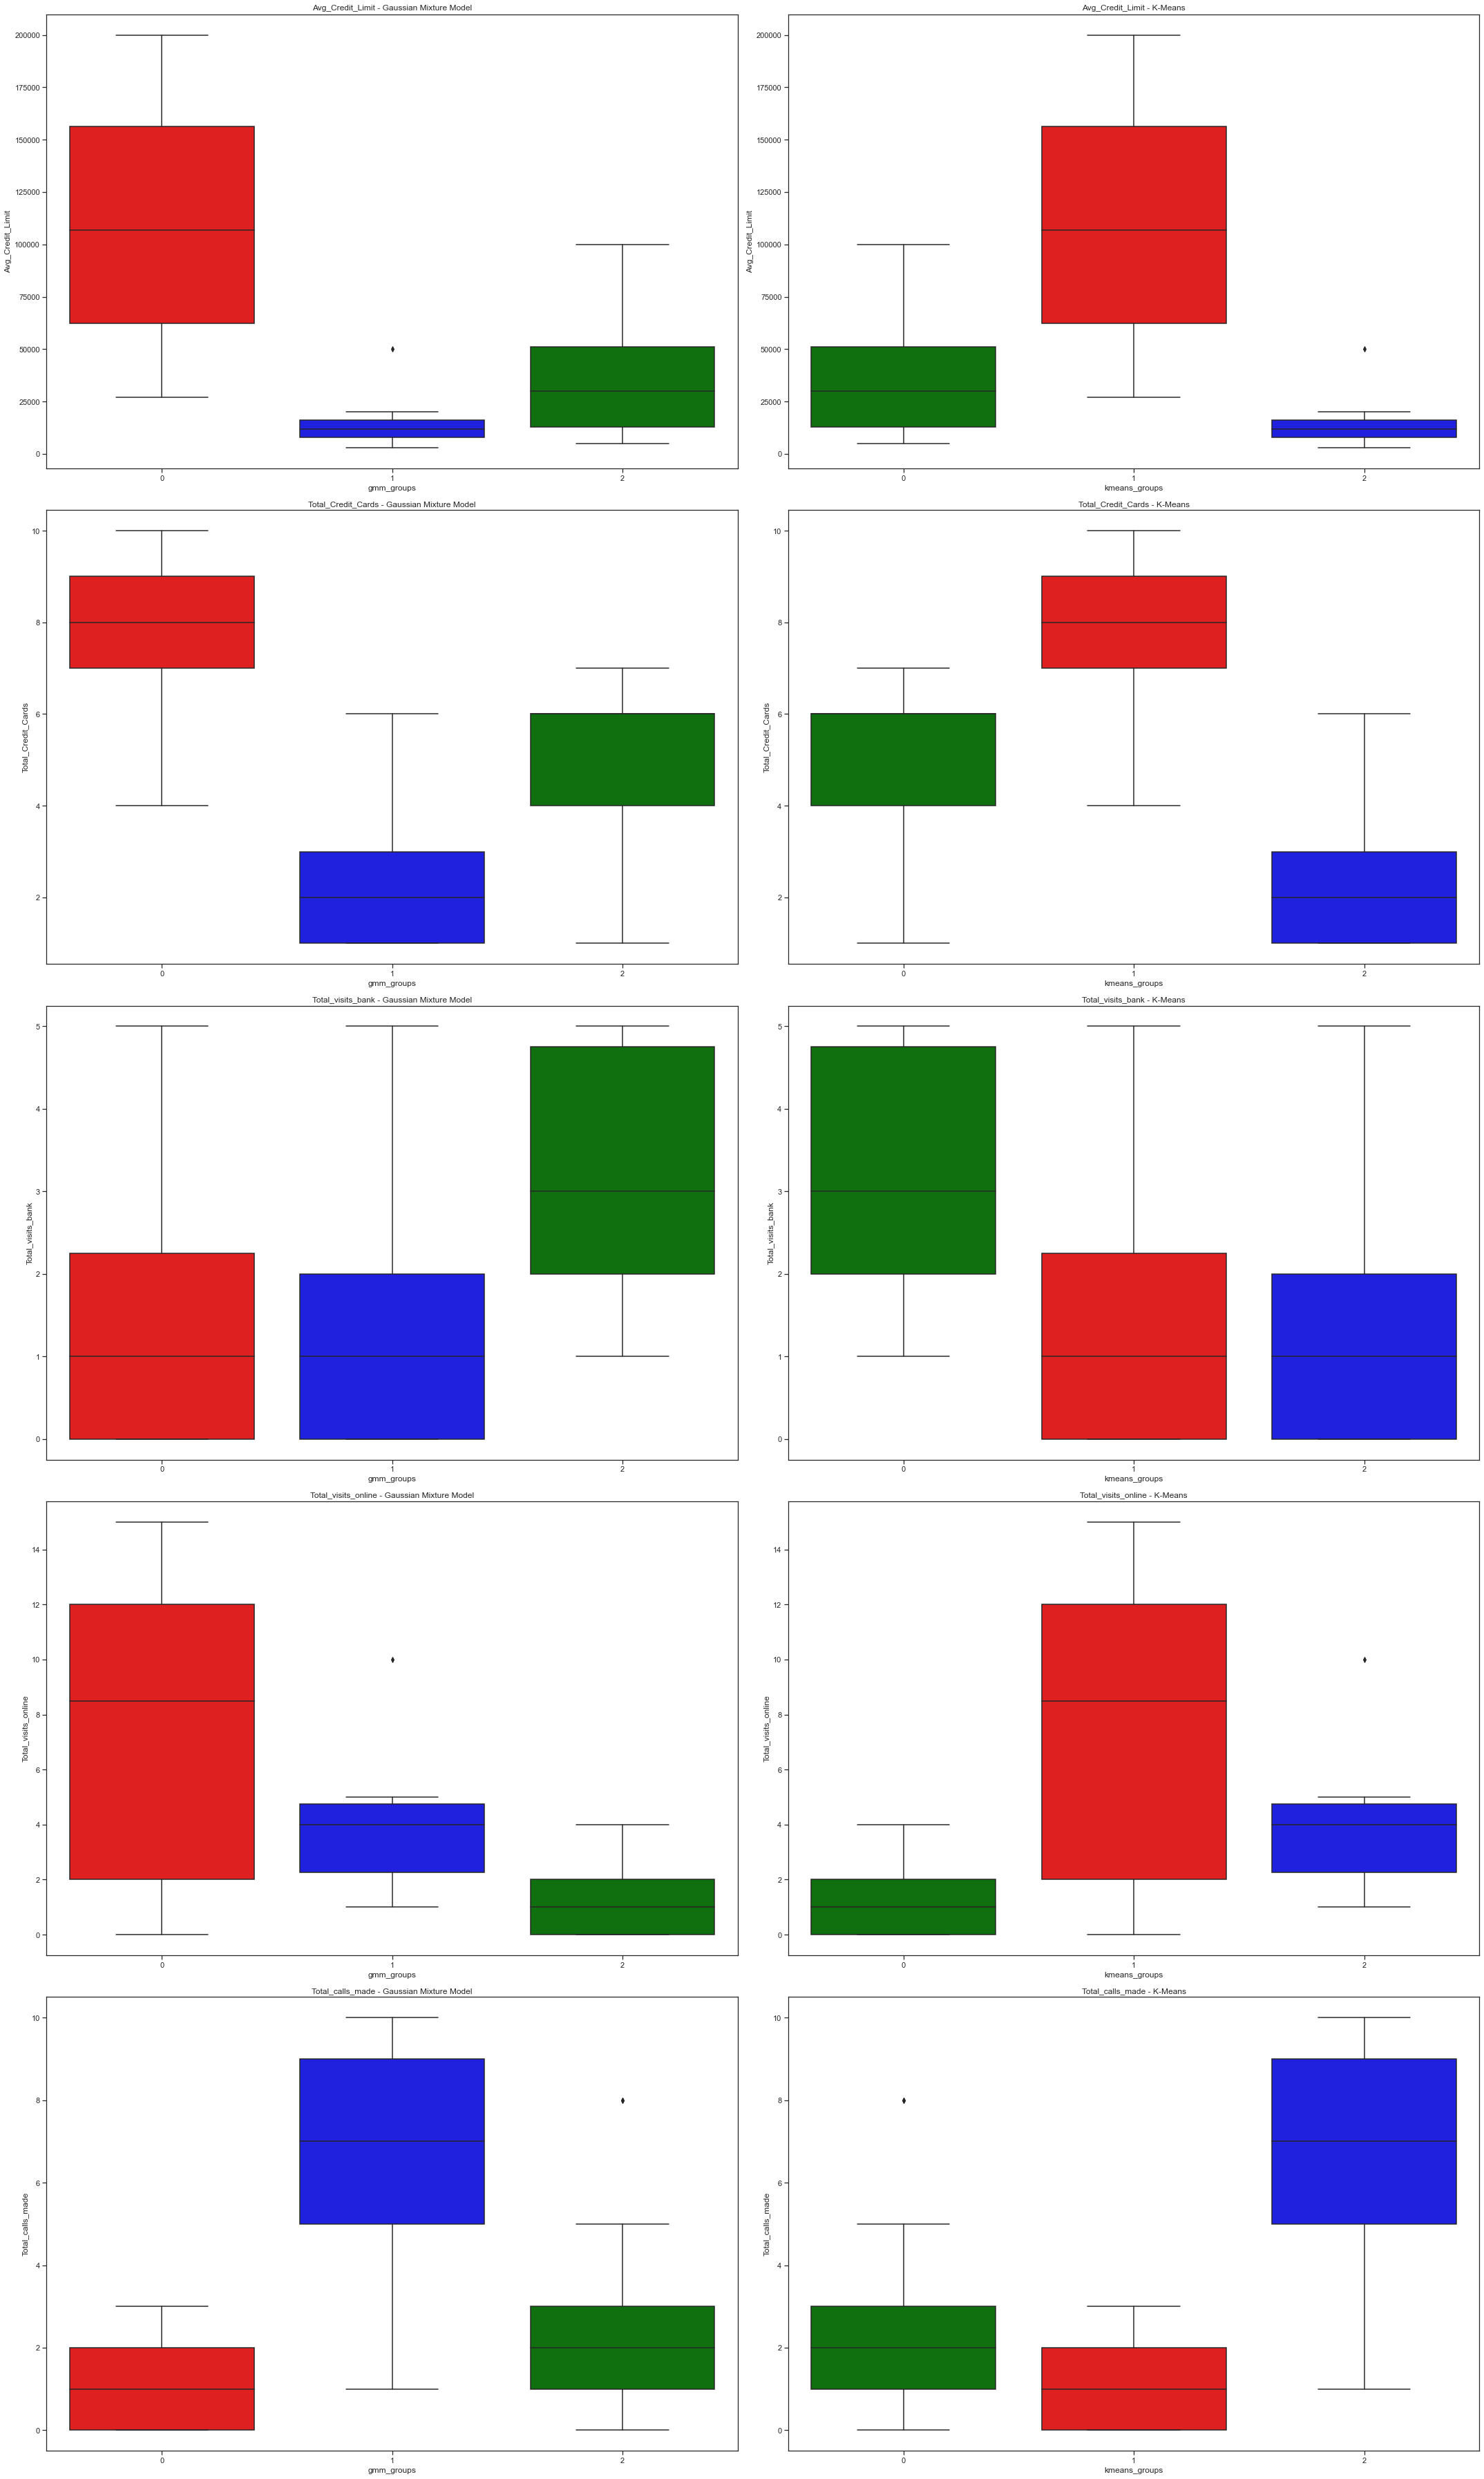

In [46]:
all_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

# Create a figure with subplots
plt.figure(figsize=(30, 50))

# Define the number of rows and columns for the subplots
num_rows = len(all_col)
num_cols = 2  # Two columns for K-Medoids and K-Means
# Define a custom color mapping for the groups
fixed_color_mapping = {1: 'red', 2: 'blue', 0: 'green'}
# Iterate through each variable
for i, variable in enumerate(all_col):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)

    # Create box plots for K-Medoids
    sns.boxplot(x=df_pca_gmm['gmm_groups'], y=df[variable], palette=color_mapping)
    plt.title(f'{variable} - Gaussian Mixture Model')

    plt.subplot(num_rows, num_cols, i * num_cols + 2)

    # Create box plots for K-Means
    sns.boxplot(x=df_pca_kmeans['kmeans_groups'], y=df[variable], palette=fixed_color_mapping)
    plt.title(f'{variable} - K-Means')

plt.tight_layout()
plt.show()

**Observations:**
- Gaussian Mixture Model results in the same grouping as K-Means, so all the grouping have the same measures as K-Means. The index number of the groups is different but the groups are still the same. In the above graphs the same groups are the same color.
- Group 2 has 374 observations in the cluster, making it the largest cluster in the dataset.
- Group 0 has 49 observations in the cluster, making it the second largest cluster in the dataset.
- Group 1 has 221 observations in the cluster, making it the smallest cluster in the dataset and by a large amount.
- Avg_Credit_Limit: Group 1 has the smallest avg_credit_limit by far. Group 02 is the secont largest avg_credit_limit. Group 0 has the largest avg_credit_limit by far. 
- Total_Credit_Cards: Group 1 has the smallest total_credit_cards. Group 02 has the second largest total_credit_cards out of the groups. Group 0 has the most amount of credit cards out of all the groups.
- Total_visits_Bank: The distibution of total_visits_bank is very similar in group 0 and group 1. Group 02 visits the bank in person the most out of all the groups.
- Total_visits_Online: Group 2 visits online the least out of all the groups. Group 1 visits online the second moust out of the groups. Group 0 visits online the most bar far out of all the groups.
- Total_Calls_Made: Group 0 makes the least calls to the bank. Group 2 makes the second most calls to the bank. Group 1 makes the most calls to the bank.

In [47]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('gmm_groups')[variables].describe()

Avg_Credit_Limit                                                  \
                      count           mean           std      min       25%   
gmm_groups                                                                    
0                      49.0  140102.040816  34163.970360  84000.0  108000.0   
1                     221.0   12239.819005   5252.830230   3000.0    8000.0   
2                     374.0   33893.048128  22125.993225   5000.0   13250.0   

                                         Total_Credit_Cards            \
                 50%       75%       max              count      mean   
gmm_groups                                                              
0           145000.0  167000.0  200000.0               49.0  8.775510   
1            12000.0   16000.0   50000.0              221.0  2.411765   
2            31500.0   51750.0  100000.0              374.0  5.508021   

                                                Total_visits_bank            \
                 std  min  25%  50%   75%   max             count      mean   
gmm_groups                                                                    
0           1.262691  5.0  8.0  9.0  10.0  10.0              49.0  0.591837   
1           1.098614  1.0  1.0  2.0   3.0   4.0             221.0  0.945701   
2           1.140852  2.0  4.0  6.0   6.0   7.0             374.0  3.489305   

                                               Total_visits_online             \
                 std  min  25%  50%   75%  max               count       mean   
gmm_groups                                                                      
0           0.496587  0.0  0.0  1.0  1.00  1.0                49.0  10.979592   
1           0.801556  0.0  0.0  1.0  2.00  2.0               221.0   3.561086   
2           1.131391  1.0  3.0  3.0  4.75  5.0               374.0   0.975936   

                                                 Total_calls_made            \
                 std  min  25%   50%   75%   max            count      mean   
gmm_groups                                                                    
0           2.854016  6.0  8.0  11.0  13.0  15.0             49.0  1.102041   
1           1.221819  1.0  2.0   4.0   4.0  10.0            221.0  6.891403   
2           0.858303  0.0  0.0   1.0   2.0   3.0            374.0  1.997326   

                                                
                 std  min  25%  50%  75%   max  
gmm_groups                                      
0           0.871897  0.0  0.0  1.0  2.0   3.0  
1           1.990196  1.0  5.0  7.0  9.0  10.0  
2           1.432107  0.0  1.0  2.0  3.0   4.0

In [48]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('kmeans_groups')[variables].describe()

Avg_Credit_Limit                                        \
                         count           mean           std      min   
kmeans_groups                                                          
0                        374.0   33893.048128  22125.993225   5000.0   
1                         49.0  140102.040816  34163.970360  84000.0   
2                        221.0   12239.819005   5252.830230   3000.0   

                                                      Total_Credit_Cards  \
                    25%       50%       75%       max              count   
kmeans_groups                                                              
0               13250.0   31500.0   51750.0  100000.0              374.0   
1              108000.0  145000.0  167000.0  200000.0               49.0   
2                8000.0   12000.0   16000.0   50000.0              221.0   

                                                              \
                   mean       std  min  25%  50%   75%   max   
kmeans_groups                                                  
0              5.508021  1.140852  2.0  4.0  6.0   6.0   7.0   
1              8.775510  1.262691  5.0  8.0  9.0  10.0  10.0   
2              2.411765  1.098614  1.0  1.0  2.0   3.0   4.0   

              Total_visits_bank                                                \
                          count      mean       std  min  25%  50%   75%  max   
kmeans_groups                                                                   
0                         374.0  3.489305  1.131391  1.0  3.0  3.0  4.75  5.0   
1                          49.0  0.591837  0.496587  0.0  0.0  1.0  1.00  1.0   
2                         221.0  0.945701  0.801556  0.0  0.0  1.0  2.00  2.0   

              Total_visits_online                                             \
                            count       mean       std  min  25%   50%   75%   
kmeans_groups                                                                  
0                           374.0   0.975936  0.858303  0.0  0.0   1.0   2.0   
1                            49.0  10.979592  2.854016  6.0  8.0  11.0  13.0   
2                           221.0   3.561086  1.221819  1.0  2.0   4.0   4.0   

                    Total_calls_made                                          \
                max            count      mean       std  min  25%  50%  75%   
kmeans_groups                                                                  
0               3.0            374.0  1.997326  1.432107  0.0  1.0  2.0  3.0   
1              15.0             49.0  1.102041  0.871897  0.0  0.0  1.0  2.0   
2              10.0            221.0  6.891403  1.990196  1.0  5.0  7.0  9.0   

                     
                max  
kmeans_groups        
0               4.0  
1               3.0  
2              10.0

In [49]:
df_pca_gmm['gmm_groups'].value_counts()

2    374
1    221
0     49
Name: gmm_groups, dtype: int64

**Comparing Clusters:**
- Gaussian Mixture Model results in the same grouping as K-Means, so all the grouping have the same measures as K-Means. The index number of the groups is different but the groups are still the same. In the above graphs the same groups are the same color. Therefore either of these clusters work well, since they are the same.
- Group 2: Group 2 is the largest group with 374 observations, so this group makes up the primary customer type of the bank. The mean credit_limit is 
$33,893, this groups mean for credit cards is 5.5 credit cards. This group has the largest mean when it comes to total_visits_bank with 3.5 visits. They are the group with the lowest visits online with a mean of .97. They make the second highest mean of total_calls_made with 1.99 calls.
- Group 0: Group 0 seems to probably be wealther customers, since they tend to have very high avg_credit_limit of $140,102 and they have the most total_credit_cards of 8.8 cards in the bank. This group is also the smallest group with only 49 observations which makes since if they are the most wealthy customers of the bank. This group also favors visiting the bank online (mean of 10.9 visits online) rather than making a call (total_calls_made, mean of 1.1 calls) or going in person (total_visits_bank, mean of .59 visits in person)
- Group 1: Group 1 is the second largest group with 221 observations. This group has the lowest mean Avg_credit_limit of $12,239, as well as the lowest number of credit cards with the bank (2.4 credit cards). This group doesnt visit the bank in person very often as the mean is 0.94 visits which is the second highest. This group visits the bank online more than group 2 but far fewer than group 0 at a mean of 3.56 visits online. This group makes the most calls to the bank by far with a mean of 6.89 calls, which is the largest of any group by far.

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [50]:
df_pca_km = df_pca.copy()

In [51]:
# Perform K-Medoids clustering with 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(df_pca_km)

KMedoids(n_clusters=3, random_state=42)

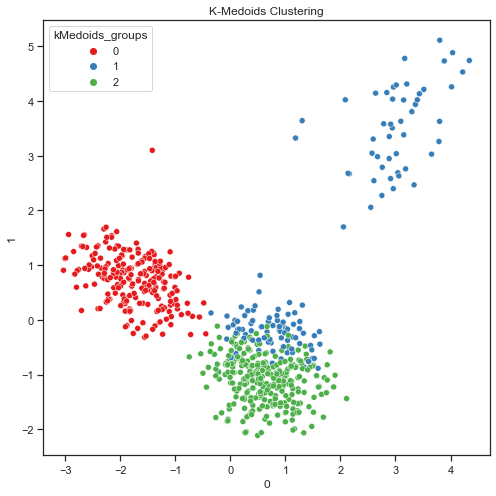

In [52]:
# Add cluster labels to your DataFrame
df_pca_km['kMedoids_groups'] = kmedoids.labels_
df['kMedoids_groups'] = kmedoids.labels_
# Define a custom color mapping for the groups
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_pca_km[0], y=df_pca_km[1], data=df_pca_km, hue=df_pca_km['kMedoids_groups'], palette='Set1')
plt.title("K-Medoids Clustering")
plt.show()

**Observations:**
- We can see that this clustering doesnt seem to be a good fit, at least visually from the graph.

#### **Create cluster profiles using the summary statistics and box plots for each label**

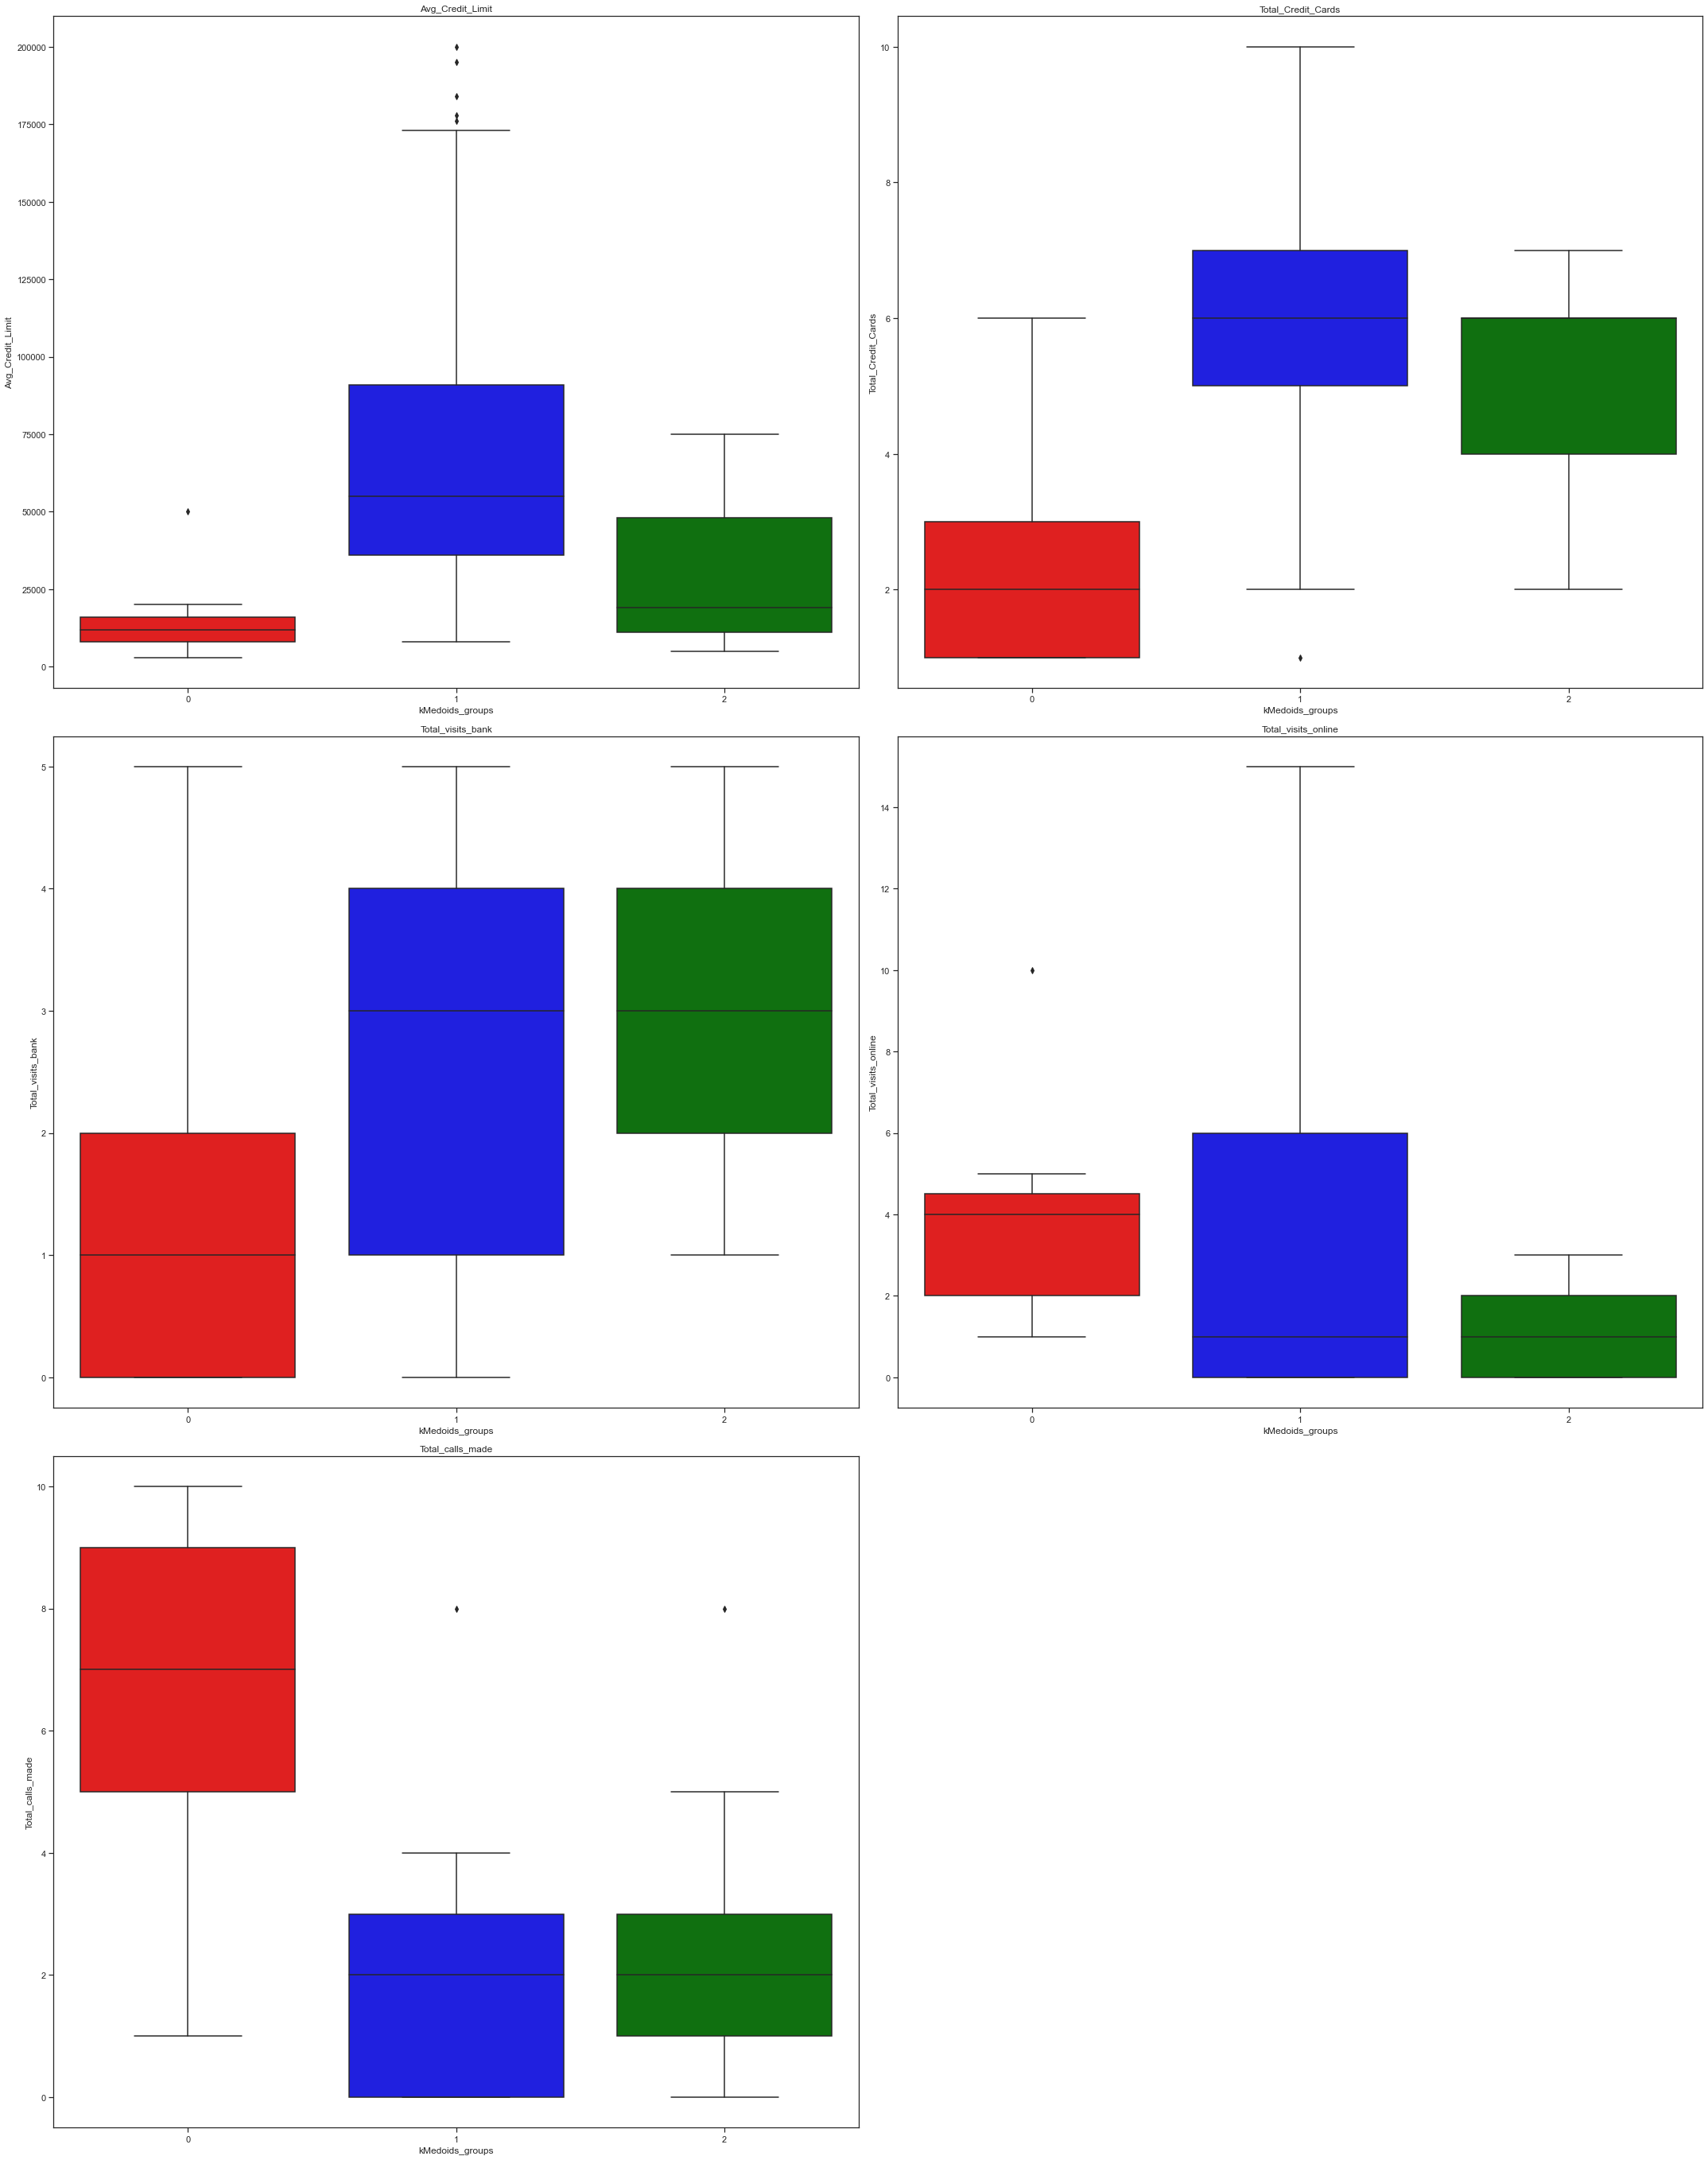

In [53]:
all_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
plt.figure(figsize=(30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(4, 2, i + 1)

    sns.boxplot(y=df[variable], x=df_pca_km['kMedoids_groups'], palette=color_mapping)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations:**
- Group 0 has 222 observations in the cluster, the second largest cluster in the dataset.
- Group 1 has 133 observations in the cluster, making it the smallest cluster in the dataset.
- Group 2 has 289 observations in the cluster, making it the largest cluster in the dataset and by a large amount.
- The clusters are more equal in size compared to the other clusterings
- Avg_Credit_Limit: Group 0 has the smallest average credit limit, followed by group 2. Group 1 being our group with the largest average credit limit.
- Total_Credit_Cards: Group 0 has the smallest total_credit_cards, followed by group 2, making group 1 the group with the most total_credit_cards at the bank.
- Total_visits_Bank: Group 0 has the least visits to the bank, group 1 and group 2 have very similar distibutions however, group 1 has a lower minimum.
- Total_visits_Online: Group 2 has the least amount of visits online, while group 0 has slightly more visits online. Group 1 makes the most visits online.
- Total_Calls_Made: Group 0 has the most calls made to the bank. Group 1 and group 2 are fairly similar with group 1 being slightly fewer calls than group 2.

In [54]:
df['kMedoids_groups'].value_counts()

2    289
0    222
1    133
Name: kMedoids_groups, dtype: int64

In [55]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('kMedoids_groups')[variables].describe()

Avg_Credit_Limit                                               \
                           count          mean           std     min      25%   
kMedoids_groups                                                                 
0                          222.0  12216.216216   5252.718159  3000.0   8000.0   
1                          133.0  85052.631579  49249.414054  6000.0  52000.0   
2                          289.0  28449.826990  19879.281727  5000.0  12000.0   

                                             Total_Credit_Cards            \
                     50%       75%       max              count      mean   
kMedoids_groups                                                             
0                12000.0   16000.0   50000.0              222.0  2.423423   
1                68000.0  114000.0  200000.0              133.0  7.030075   
2                20000.0   41000.0   75000.0              289.0  5.363322   

                                                    Total_visits_bank  \
                      std  min  25%  50%  75%   max             count   
kMedoids_groups                                                         
0                1.109805  1.0  1.0  2.0  3.0   5.0             222.0   
1                1.774994  2.0  6.0  7.0  8.0  10.0             133.0   
2                1.110010  4.0  4.0  5.0  6.0   7.0             289.0   

                                                              \
                     mean       std  min  25%  50%  75%  max   
kMedoids_groups                                                
0                0.950450  0.802865  0.0  0.0  1.0  2.0  2.0   
1                1.691729  1.031184  0.0  1.0  2.0  2.0  4.0   
2                3.830450  1.011551  2.0  3.0  4.0  5.0  5.0   

                Total_visits_online                                          \
                              count      mean       std  min  25%  50%  75%   
kMedoids_groups                                                               
0                             222.0  3.554054  1.223546  1.0  2.0  4.0  4.0   
1                             133.0  4.639098  5.201017  0.0  1.0  2.0  9.0   
2                             289.0  0.982699  0.859816  0.0  0.0  1.0  2.0   

                      Total_calls_made                                     \
                  max            count      mean       std  min  25%  50%   
kMedoids_groups                                                             
0                10.0            222.0  6.878378  1.995148  1.0  5.0  7.0   
1                15.0            133.0  1.969925  1.386842  0.0  1.0  2.0   
2                 2.0            289.0  1.851211  1.414952  0.0  1.0  2.0   

                            
                 75%   max  
kMedoids_groups             
0                9.0  10.0  
1                3.0   4.0  
2                3.0   4.0

**Cluster Profiles:**
- Group 0: Group 0 is the second largest group with 222 observations, so this group makes up a large part of customer type of the bank. The mean credit_limit is $12,216, this groups mean for credit cards is 2.4 credit cards. This group has the smallest mean when it comes to total_visits_bank with .95 visits. They have the second highest visits online with a mean of .3.55. They have the highest mean of total_calls_made with 6.88 calls.
- Group 1: Group 1 seems to probably be wealther customers, since they tend to have very high avg_credit_limit with a mean of $85,052 and they have the most total_credit_cards of 7.03 cards in the bank. This group is also the smallest group with only 133 observations which makes since if they are the most wealthy customers of the bank. This group also favors visiting the bank online (mean of 4.63 visits online) rather than making a call (total_calls_made, mean of 1.96 calls) or going in person (total_visits_bank, mean of 1.69 visits in person)
- Group 2: Group 2 is the largest group with 289 observations. This group has the second highest mean Avg_credit_limit of $28,449, as well as the second number of credit cards with the bank (5.36 credit cards). This group visits the bank the most in person with a mean of 3.83 visits which is the highest. This group visits the bank online by far the least with a mean of 0.98. This group is similar to group 1 with the number of calls they make with a mean of 1.85.

#### **Compare the clusters from K-Means and K-Medoids** 

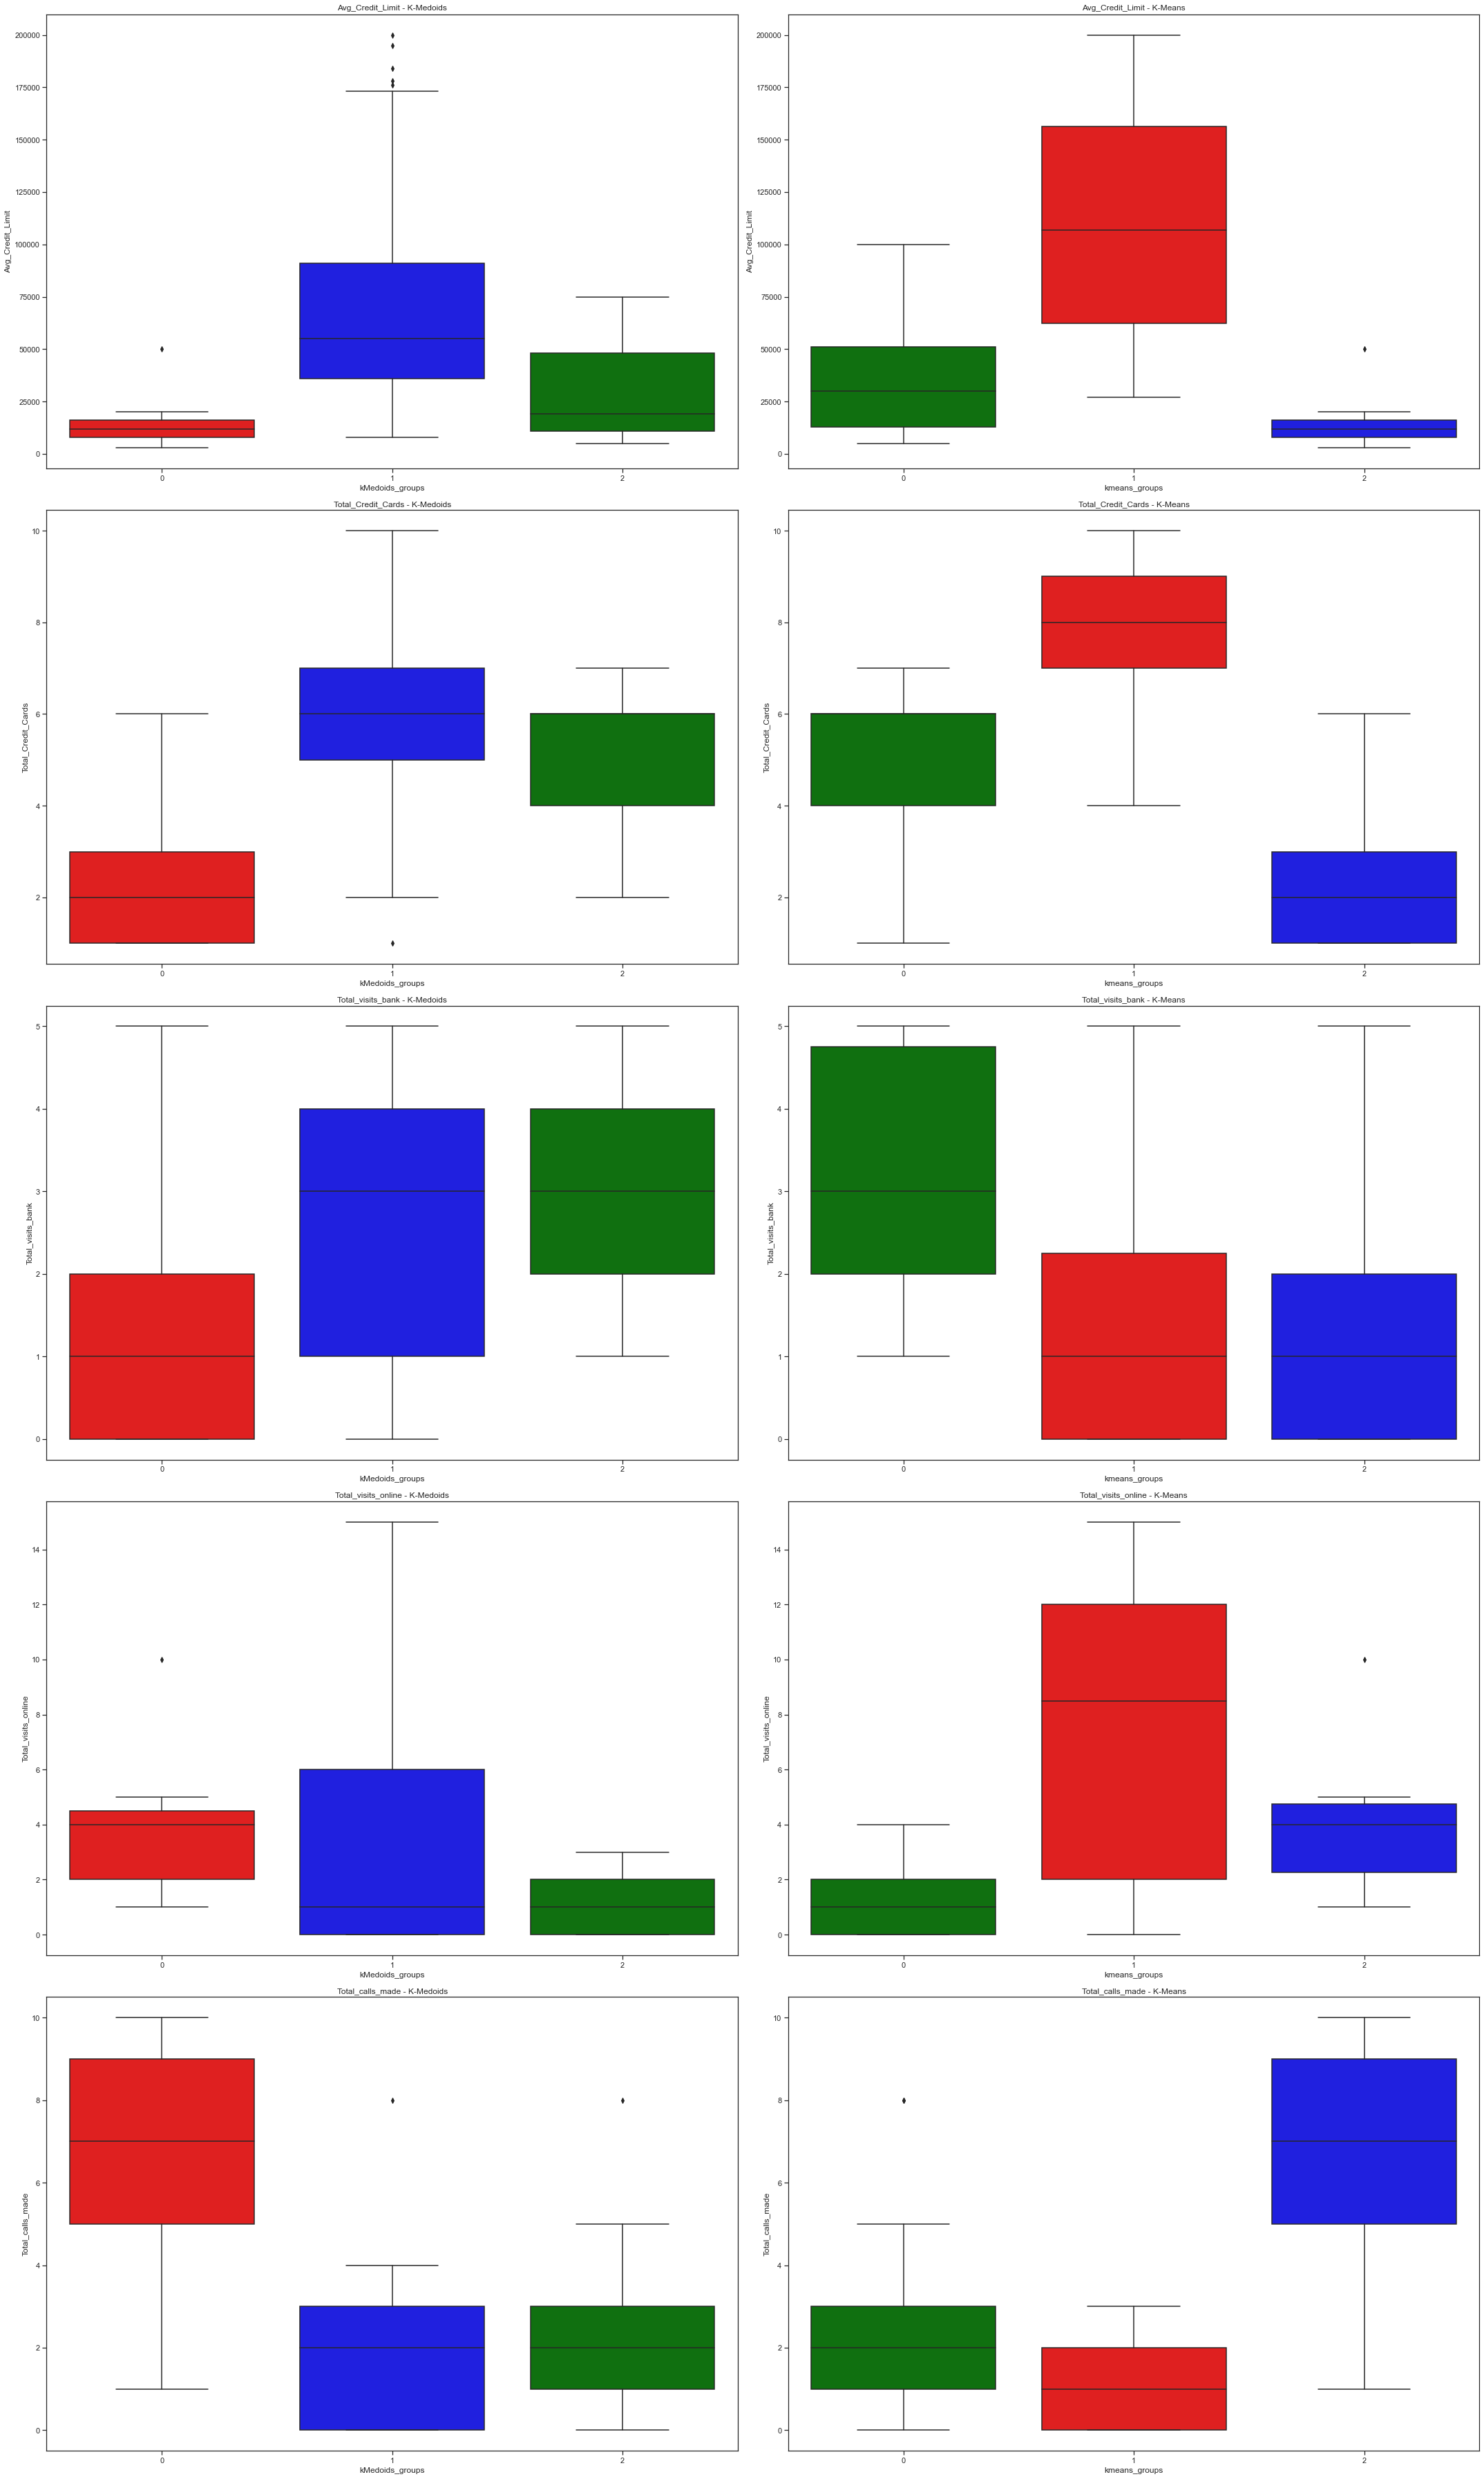

In [56]:
all_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

# Create a figure with subplots
plt.figure(figsize=(30, 50))

# Define the number of rows and columns for the subplots
num_rows = len(all_col)
num_cols = 2  # Two columns for K-Medoids and K-Means
fixed_color_mapping = {1: 'red', 2: 'blue', 0: 'green'}
# Iterate through each variable
for i, variable in enumerate(all_col):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)

    # Create box plots for K-Medoids
    sns.boxplot(x=df_pca_km['kMedoids_groups'], y=df[variable], palette=color_mapping)
    plt.title(f'{variable} - K-Medoids')

    plt.subplot(num_rows, num_cols, i * num_cols + 2)

    # Create box plots for K-Means
    sns.boxplot(x=df_pca_kmeans['kmeans_groups'], y=df[variable], palette=fixed_color_mapping)
    plt.title(f'{variable} - K-Means')

plt.tight_layout()
plt.show()

In [57]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('kmeans_groups')[variables].describe()

Avg_Credit_Limit                                        \
                         count           mean           std      min   
kmeans_groups                                                          
0                        374.0   33893.048128  22125.993225   5000.0   
1                         49.0  140102.040816  34163.970360  84000.0   
2                        221.0   12239.819005   5252.830230   3000.0   

                                                      Total_Credit_Cards  \
                    25%       50%       75%       max              count   
kmeans_groups                                                              
0               13250.0   31500.0   51750.0  100000.0              374.0   
1              108000.0  145000.0  167000.0  200000.0               49.0   
2                8000.0   12000.0   16000.0   50000.0              221.0   

                                                              \
                   mean       std  min  25%  50%   75%   max   
kmeans_groups                                                  
0              5.508021  1.140852  2.0  4.0  6.0   6.0   7.0   
1              8.775510  1.262691  5.0  8.0  9.0  10.0  10.0   
2              2.411765  1.098614  1.0  1.0  2.0   3.0   4.0   

              Total_visits_bank                                                \
                          count      mean       std  min  25%  50%   75%  max   
kmeans_groups                                                                   
0                         374.0  3.489305  1.131391  1.0  3.0  3.0  4.75  5.0   
1                          49.0  0.591837  0.496587  0.0  0.0  1.0  1.00  1.0   
2                         221.0  0.945701  0.801556  0.0  0.0  1.0  2.00  2.0   

              Total_visits_online                                             \
                            count       mean       std  min  25%   50%   75%   
kmeans_groups                                                                  
0                           374.0   0.975936  0.858303  0.0  0.0   1.0   2.0   
1                            49.0  10.979592  2.854016  6.0  8.0  11.0  13.0   
2                           221.0   3.561086  1.221819  1.0  2.0   4.0   4.0   

                    Total_calls_made                                          \
                max            count      mean       std  min  25%  50%  75%   
kmeans_groups                                                                  
0               3.0            374.0  1.997326  1.432107  0.0  1.0  2.0  3.0   
1              15.0             49.0  1.102041  0.871897  0.0  0.0  1.0  2.0   
2              10.0            221.0  6.891403  1.990196  1.0  5.0  7.0  9.0   

                     
                max  
kmeans_groups        
0               4.0  
1               3.0  
2              10.0

In [58]:
variables = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df.groupby('kMedoids_groups')[variables].describe()

Avg_Credit_Limit                                               \
                           count          mean           std     min      25%   
kMedoids_groups                                                                 
0                          222.0  12216.216216   5252.718159  3000.0   8000.0   
1                          133.0  85052.631579  49249.414054  6000.0  52000.0   
2                          289.0  28449.826990  19879.281727  5000.0  12000.0   

                                             Total_Credit_Cards            \
                     50%       75%       max              count      mean   
kMedoids_groups                                                             
0                12000.0   16000.0   50000.0              222.0  2.423423   
1                68000.0  114000.0  200000.0              133.0  7.030075   
2                20000.0   41000.0   75000.0              289.0  5.363322   

                                                    Total_visits_bank  \
                      std  min  25%  50%  75%   max             count   
kMedoids_groups                                                         
0                1.109805  1.0  1.0  2.0  3.0   5.0             222.0   
1                1.774994  2.0  6.0  7.0  8.0  10.0             133.0   
2                1.110010  4.0  4.0  5.0  6.0   7.0             289.0   

                                                              \
                     mean       std  min  25%  50%  75%  max   
kMedoids_groups                                                
0                0.950450  0.802865  0.0  0.0  1.0  2.0  2.0   
1                1.691729  1.031184  0.0  1.0  2.0  2.0  4.0   
2                3.830450  1.011551  2.0  3.0  4.0  5.0  5.0   

                Total_visits_online                                          \
                              count      mean       std  min  25%  50%  75%   
kMedoids_groups                                                               
0                             222.0  3.554054  1.223546  1.0  2.0  4.0  4.0   
1                             133.0  4.639098  5.201017  0.0  1.0  2.0  9.0   
2                             289.0  0.982699  0.859816  0.0  0.0  1.0  2.0   

                      Total_calls_made                                     \
                  max            count      mean       std  min  25%  50%   
kMedoids_groups                                                             
0                10.0            222.0  6.878378  1.995148  1.0  5.0  7.0   
1                15.0            133.0  1.969925  1.386842  0.0  1.0  2.0   
2                 2.0            289.0  1.851211  1.414952  0.0  1.0  2.0   

                            
                 75%   max  
kMedoids_groups             
0                9.0  10.0  
1                3.0   4.0  
2                3.0   4.0

**Comparing Clusters:**
- The cluster index are different
    - k-medoid - Group 0 = k-means - Group 2. This will be Group 0 for analysis
    - k-medoid - Group 1 = k-means - Group 1. This will be Group 1 for analysis
    - k-medoid - Group 2 = k-means - Group 0. This will be Group 2 for analysis
- K-Means is a better cluster because it seperates the clusters better. It seperates the high avg_credit_limit, high total_credit_cards, and total_online_visits from the other two clusters. We can see this in the k-medoid cluster plot where one of the clusters is grabbing some of the customers in another cluster. We can observe this in the data below, while Group 0 only has one observation difference, Group 1 and Group 2 have almost 100 difference in observations between clustering algorithms.
- Group 0:
    - K-means: 222 observations, The mean avg_credit_limit is $12,239, The mean total_credit_cards is 2.4, The mean total_visits_bank is 0.95, The mean total_visits_online is 3.5, The mean total_calls_made is 6.87.
    - k-medoid: 221 observations, The mean avg_credit_limit is $12,216, The mean total_credit_cards is 8.7, The mean total_visits_bank is 0.94, The mean total_visits_online is 3.5, The mean total_calls_made is 6.89.
- Group 1:
    - K-means: 49 observations, The mean avg_credit_limit is $140,102, The mean total_credit_cards is 2.4, The mean total_visits_bank is 0.59, The mean total_visits_online is 10.9, The mean total_calls_made is 1.1.
    - k-medoid: 133 observations, The mean avg_credit_limit is $85,052, The mean total_credit_cards is 7, The mean total_visits_bank is 1.69, The mean total_visits_online is 4.6, The mean total_calls_made is 1.96.
- Group 2:
    - K-means: 374 observations, The mean avg_credit_limit is $33,893, The mean total_credit_cards is 5.5, The mean total_visits_bank is 3.48, The mean total_visits_online is .97, The mean total_calls_made is 1.99.
    - k-medoid: 289 observations, The mean avg_credit_limit is $28,449, The mean total_credit_cards is 5.3, The mean total_visits_bank is 3.8, The mean total_visits_online is .98, The mean total_calls_made is 1.8.
- Conclusion: K-Means does a better job clustering the Customer base into 3 distinct clusters that are very different from one another. For example Group 0 is the banks low credit_limit, low credit card, makes lots of calls group, which is the second largest group at the bank. Group 1 which is very high credit_limit, high credit cards, and visits the bank online group, this group is the smallest group. Group 2 has a moderate amount of credit_limit, moderate amount of credit_cards, and visists the bank in person, this group makes up the majority of the banks customers.

## **Conclusions and Business Recommendations**

**Conclusions and Recommendations:**
- Conclusions: 
    - Group 0: Group 0 is the second largest group in our bank. This group has the lowest mean avt_credit_limit, the lowest mean total_credit_cards, and this group tends to call the bank the most rather than go in person or visit online.
    - Group 1: Group 1 is the smallest group in our bank. This group has the the highest mean avt_credit_limit, the highest mean total_credit_cards, and this group tends to visit the bank online rather than go in person or call.
    - Group 2: Greoup 2 is the largest group in our bank, making up the majority of the customer base. This Group has a higher mean avt_credit_limit, mean total_credit_cards then Group 0, but has a much smaller mean avt_credit_limit, mean total_credit_cards then Group 1. This group also tends to visit the bank in person, rather than call or visit online.

- Recommendations:
    - Group 0: This group should be targeted for marketing campaigns around having low avg_credit_limit, and total_credit_cards. The call centers should be most familiar with inqueries regarding what these customers might have questions about, to improve the overall customer support for calls. This is because this group is the majority of calls made to the bank.
    - Group 1: This group should be targeted for marketing campaigns around having very high avg_credit_limit, and total_credit_cards. In regards to support services, the online bank should be the most robust for this group since they make by far the most online visits. 
    - Group 2: This group should be targeted for marketing campaings around having moderate avg_credit_limit, and total_credit_cards. In regards to support services, the in person bank should be most equipped for this group's questions as they make up by far the most in person visits to the bank.

In [59]:
!jupyter nbconvert --to html Learner_Notebook_USL_FullCode_Version.ipynb

[NbConvertApp] Converting notebook Learner_Notebook_USL_FullCode_Version.ipynb to html
C:\Users\Grego\AppData\Roaming\Python\Python39\site-packages\nbconvert\filters\widgetsdatatypefilter.py:69: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
[NbConvertApp] Writing 2230293 bytes to Learner_Notebook_USL_FullCode_Version.html
